#🏷️ Project Title & Introduction

# Titanic Survival Analysis – EDA with Python

This project explores the Titanic dataset to identify key factors that influenced passenger survival. The analysis includes data cleaning, feature engineering, visualization, and preparation for future modeling.


#📦 Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import warnings
import xgboost


#📁 Load and Preview the Dataset

In [2]:
df =pd.read_excel('/content/drive/MyDrive/Titanic/titanic3.xls')

In [3]:
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


**Basic dataset overview**

The Titanic dataset contains 1309 rows and 14 columns. It includes both categorical and numerical variables. The target column is Survived, where:

  *   0 means the passenger did not survive
  *   1 means the passenger survived
The main goal is to explore which variables most strongly influence a passenger’s survival.

In [5]:
df.drop(['boat','body', 'home.dest'], axis =1, inplace= True)

In [6]:
df.columns = df.columns.str.capitalize()

#🔍 Column Overview and Data Dictionary

**Detailed Explanation of Each Column**

1.   **Survived** – Indicates survival (0 = did not survive, 1 = survived).
2. **Pclass** – Passenger Class, reflecting socio-economic status:
      *   1 = 1st Class (Upper) – Wealthy passengers, best facilities
      *   2 = 2nd Class (Middle) – Middle-class passengers
      *   3 = 3rd Class (Lower) – Working-class or immigrants
3. **Name** – Full name of the passenger. Titles (e.g., Mr, Mrs, Miss) can be extracted from this column.
4. **Sex** – Gender of the passenger (male or female).
5. **Age** – Age of the passenger (in years). Some values are missing.
6. **SibSp** – Number of siblings and spouses the passenger had aboard.
7. **Parch** – Number of parents and children the passenger had aboard.
8. **Ticket** – Ticket number or code. Some passengers shared tickets, indicating group or family travel.
9. **Fare** – The amount (in British pounds) paid for the ticket. Could be shared among multiple passengers.
10. **Cabin** – Cabin number. Many values are missing. The first letter often indicates the deck.
11. **Embarked** – Port where the passenger boarded the ship:
      *   C = Cherbourg (France)
      *   Q = Queenstown (Ireland)
      *   S = Southampton (England)












#🧹 Data Cleaning & Missing Values

**Missing Values**

I have missing values in the columns: Age, Fare, Cabin and Embarked.
Age and Fare columns' missing values will be filled with median. Cabin column's null values will be filled with 'has Cabin' values and Embarked null values will be filled with the most frequent value (I will use 'mode' function).

In [7]:
# Find how many null values do we have in Age column:
print("Age column's null values:",df['Age'].isnull().sum())

# Fill Age column's null values with median.
df['Age'] = df['Age'].fillna(df['Age'].median())

print("Age column's null values after replacing:",df['Age'].isnull().sum())






Age column's null values: 263
Age column's null values after replacing: 0


In [8]:
# Find how many null values do we have in Fare column:
print("Fare column's null values:",df['Fare'].isnull().sum())

# Fill Fare column's null values with median.
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

print("Fare column's null values after replacing:",df['Fare'].isnull().sum())

Fare column's null values: 1
Fare column's null values after replacing: 0


In [9]:
# Find how many null values do we have in Cabin column:
print("Cabin column's null values:",df['Cabin'].isnull().sum())

# Fill Cabin column's null values with "No Cabin" value:
df['Cabin'] = df['Cabin'].fillna('No Cabin')

print("Cabin column's null values after replacing",df['Cabin'].isnull().sum())

Cabin column's null values: 1014
Cabin column's null values after replacing 0


In [10]:
# Find how many null values do we have in Embarked column:
print("Embarked column's null values:", df['Embarked'].isnull().sum())

# Fill Embarked column's null values with most frequent values:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("Embarked column's null values after replacing:", df['Embarked'].isnull().sum())


Embarked column's null values: 2
Embarked column's null values after replacing: 0


#⚙️ Memory Optimization

**Optimizing Memory Usage by Changing Data Types**

The dataset can be optimized by converting some columns to more memory-efficient data types.
This is especially helpful when working with large datasets, as it reduces memory usage and improves performance.
I will :

      *   Convert integer columns with small value ranges to int8 or int16.
      *   Convert float columns to float32 where possible.
      *   Convert object columns with repeated values to category.





In [11]:
# See the momery usage:
start_mem = df.memory_usage(deep=True).sum()/1024

In [12]:
df.describe()

,Pclass,Survived,Age,Sibsp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,29.503183,0.498854,0.385027,33.281086
std,0.837836,0.486055,12.905246,1.041658,0.865560,51.741500
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


I have 6 quantitative columns with datatype of int64 and float 64. Let's examine each columns and change types if it is possible.

In [13]:
# Survived min value is 0 and max value is 1. So, I can change this column's type from int64 to int8
df['Survived'] = df['Survived'].astype('int8')

# Pclass min value is 1 and max value is 3. So, I can change this column's type from int64 to int8
df['Pclass'] = df['Pclass'].astype('int8')

# Sibsp min value is 0 and max value is 8. So, I can change this column's type from int64 to int8
df['Sibsp'] = df['Sibsp'].astype('int8')

# Parch min value is 0 and max value is 9. So, I can change this column's type from int64 to int8
df['Parch'] = df['Parch'].astype('int8')

# Age min value is 0.17 and max value is 80. So, I can change this column's type from float64 to float32
df['Age'] = df['Age'].astype('Float32')

# Fare min value is 0 and max value is 512.329200. So, I can change this column's type from float64 to float32
df['Fare'] = df['Fare'].astype('Float32')

I have 5 categorical columns with datatype "Object". Let's examine each columns.

In [14]:
# Examine Sex column. Find out how many unique values are in this column.
print(df['Sex'].value_counts())

# As I know, this column is categorical. So, for further use, encode to binary classification for modeling:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

print(df['Sex'].value_counts())


Sex
male      843
female    466
Name: count, dtype: int64
Sex
0    843
1    466
Name: count, dtype: int64


In [15]:
# Examine Ticket column:
print(df['Ticket'].value_counts())

# There is high cardinality (many unique values). And this column is not quite usefull for further modeling. So, I can drop this column.

df = df.drop('Ticket', axis = 1)


Ticket
CA. 2343      11
CA 2144        8
1601           8
PC 17608       7
347077         7
              ..
350406         1
349252         1
345767         1
359309         1
C.A. 49867     1
Name: count, Length: 939, dtype: int64


In [16]:
# Examine Name column:
print(df['Name'].value_counts())

# I do not need this column for further analisis and modelig. So, I can drop it from dataset.

df = df.drop('Name', axis = 1)

Name
Kelly, Mr. James                     2
Connolly, Miss. Kate                 2
Ilmakangas, Miss. Ida Livija         1
Ilieff, Mr. Ylio                     1
Ibrahim Shawah, Mr. Yousseff         1
                                    ..
Harris, Mr. George                   1
Harper, Rev. John                    1
Harper, Miss. Annie Jessie "Nina"    1
Harbeck, Mr. William H               1
Herman, Mr. Samuel                   1
Name: count, Length: 1307, dtype: int64


In [17]:
# Examine Cabin column:
print(df['Cabin'].value_counts())

# There are too many missing values in this column. But this column is quite meaningfull, because it contains paseenger deck,
# which may correlate Pcalss and columns. Lower decks may flooded first.
# So, extract this feature and encode it. It might help some models improve prediction accuracy.

df['Deck'] = df['Cabin'].apply(lambda x: x if x == 'No Cabin' else str(x)[0])
print(df['Deck'].value_counts())

df = df.drop('Cabin', axis = 1)

df['Deck'] = df['Deck'].astype('category')

Cabin
No Cabin           1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
D                     4
                   ... 
F E46                 1
F E57                 1
F E69                 1
E10                   1
F38                   1
Name: count, Length: 187, dtype: int64
Deck
No Cabin    1014
C             94
B             65
D             46
E             41
A             22
F             21
G              5
T              1
Name: count, dtype: int64


In [18]:
# Examine Embarked column:
print(df['Embarked'].value_counts())

# I have 3 unique values in this column. So, I can change datatype to "category" and then, for modeling use one-hot encode.

df['Embarked'] = df['Embarked'].astype('category')

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64


In [19]:
# Let's see datatype changes and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    1309 non-null   int8    
 1   Survived  1309 non-null   int8    
 2   Sex       1309 non-null   int64   
 3   Age       1309 non-null   Float32 
 4   Sibsp     1309 non-null   int8    
 5   Parch     1309 non-null   int8    
 6   Fare      1309 non-null   Float32 
 7   Embarked  1309 non-null   category
 8   Deck      1309 non-null   category
dtypes: Float32(2), category(2), int64(1), int8(4)
memory usage: 31.3 KB


In [20]:
end_mem = df.memory_usage(deep=True).sum()/ 1024
print(f"Memory usage reduced from {start_mem:.1f} KB to {end_mem:.1f} KB "
      f"({100 * (start_mem - end_mem) / start_mem:.1f}% reduction)")

Memory usage reduced from 483.7 KB to 31.9 KB (93.4% reduction)


**Memory Optimization Result**

After converting appropriate columns to more efficient data types (e.g., category, float32, int16), **the memory usage dropped significantly**:

    *   **Before optimization:** 483.7 KB
    *   **After optimization:** 31.9 KB
This is a **93.4% reduction in memory usage**, which helps improve performance, especially when working with larger datasets.



#📊 Univariate Analysis

Univariate analysis helps me to understand the distribution, range, frequency, or patterns of each feature individually, before looking at relationships between them.
With univariate analysis, I can:

    *   Detect outliers
    *   Understand value distributions
    *   Spot imbalanced classes
    *   Decide how to clean, bin, or transform data

So, examine each column.





## Survived
Univariate analysis on "Survived" column helps me to understand how balanced or imbalanced survival data is:

In [21]:
df['Survived'].value_counts()

,count
Survived,
0,809
1,500


<ipython-input-22-fe25dfbcf73e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  surv = sns.countplot(x = 'Survived', data =df, palette = 'Set1')


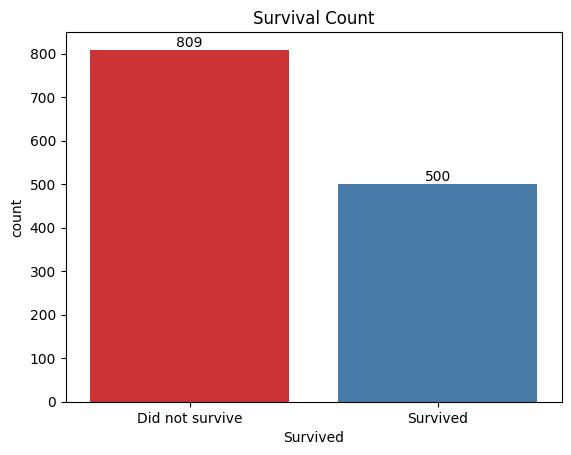

In [22]:
surv = sns.countplot(x = 'Survived', data =df, palette = 'Set1')
for i in surv.containers:
    surv.bar_label(i, label = 'edge', fontsize =10)
plt.title('Survival Count')
plt.xticks([0,1], ['Did not survive', 'Survived'])
plt.show()

This is the clear visualization how many people survived.

In [23]:
# Calculate proportions
df['Survived'].value_counts(normalize=True)

,proportion
Survived,
0,0.618029
1,0.381971


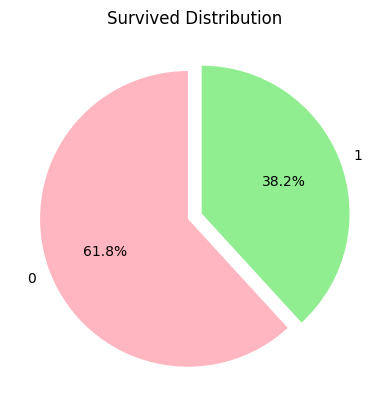

In [24]:
df['Survived'].value_counts().plot(kind='pie',  autopct='%1.1f%%',
                              startangle=90, colors=[ 'lightpink', 'lightgreen'],
                              explode=(0.05, 0.05), labels=['0', '1' ])
plt.title('Survived Distribution')
plt.ylabel('')
plt.show()

This means, that survival rate is 38.2%

## Pclass
Now, examine next variable and understand how passengers are distributed accross the three passenger classes.

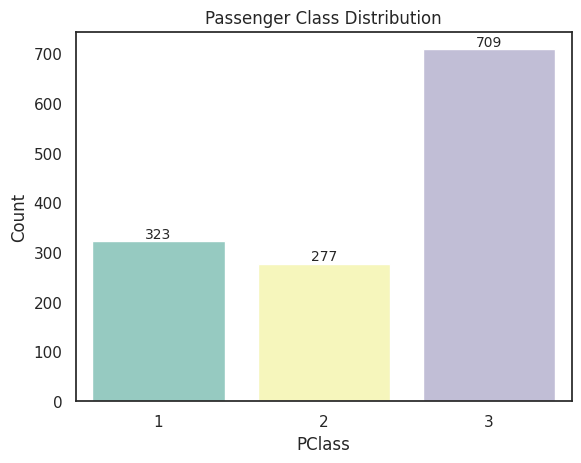

In [130]:
warnings.filterwarnings('ignore')
pclass_plot = sns.countplot(x = 'Pclass', data = df, order = [1,2,3], palette = 'Set3')
for i in pclass_plot.containers:
    pclass_plot.bar_label(i, label='edge', fontsize =10 )
plt.title('Passenger Class Distribution')
plt.xlabel('PClass')
plt.ylabel('Count')
plt.show()

In [131]:
print(df['Pclass'].value_counts(normalize= True)*100)

Pclass
3    54.163484
1    24.675325
2    21.161192
Name: proportion, dtype: float64


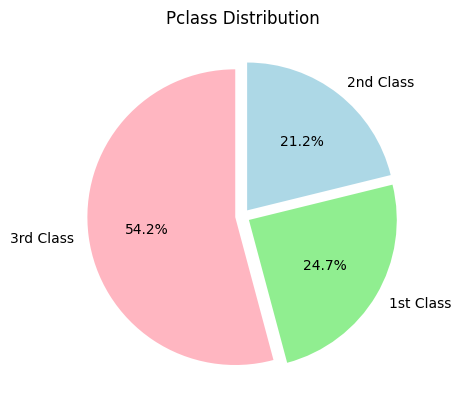

In [27]:
df['Pclass'].value_counts().plot(kind='pie',  autopct='%1.1f%%',
                              startangle=90, colors=[ 'lightpink', 'lightgreen', 'lightblue'],
                              explode=(0.05, 0.05,0.05), labels=['3rd Class', '1st Class', '2nd Class' ])
plt.title('Pclass Distribution')
plt.ylabel('')
plt.show()

- Most passengers were in **3rd class** (54.2%), followed by 1st and 2nd class.
- This shows a clear skew toward lower-class passengers, which might correlate with survival.

## Sex
Now, Understand the distribution of passengers by gender ⬇

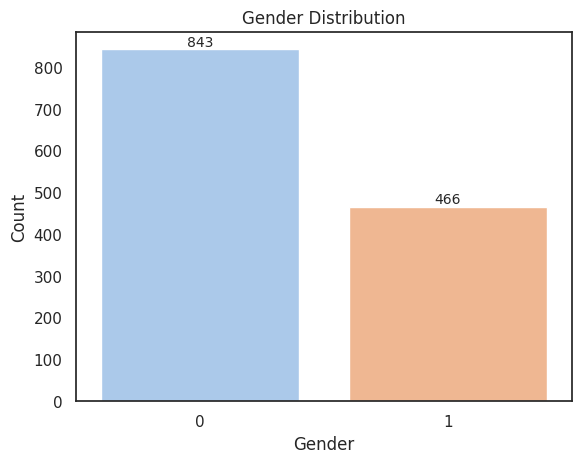

In [132]:
sex_plot = sns.countplot(x = 'Sex', data = df, palette = 'pastel')
for i in sex_plot.containers:
    sex_plot.bar_label(i, label ='edge', fontsize =10)
plt.title ('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [29]:
df['Sex'].value_counts(normalize=True).reset_index().rename(
    columns={'index': 'Sex', 'Sex': 'Percentage'})


,Percentage,proportion
0,0,0.644003
1,1,0.355997


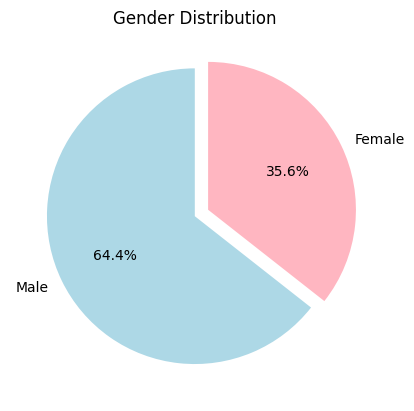

In [30]:
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%',
                              startangle=90, colors=['lightblue', 'lightpink'],
                              explode=(0, 0.1), labels=['Male', 'Female'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


- There are more **male** passengers (about 64.4%) than **female** (35.6%).
- This imbalance is important to consider, especially when analyzing survival rates by gender.

## Age

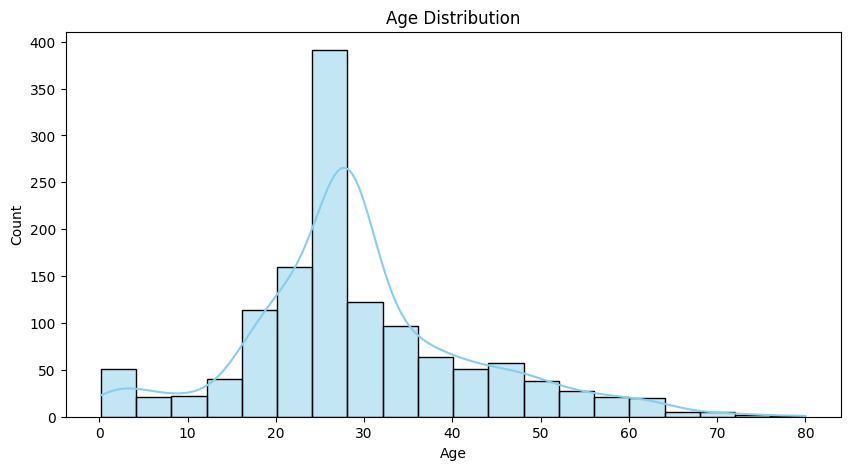

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue')
plt.title('Age Distribution')
plt.show()

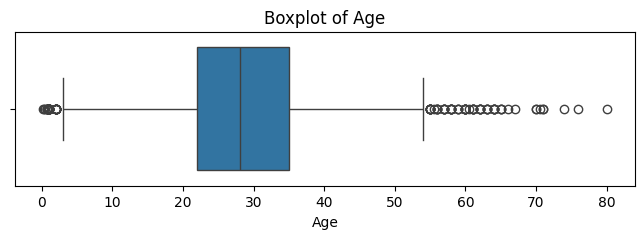

In [32]:
# Find outliers
plt.figure(figsize=(8,2))
sns.boxplot(x= df['Age'] )
plt.title('Boxplot of Age')
plt.show()

According to the box plot, I can see:
1. Median age is around 29.
2. Most passengers are aged between 22 and 35.
3. There are some young outliers (babies) and older outliers (53–80 years).
4. The distribution is slightly right-skewed (longer tail on the right).

In [33]:
# Calculate Outliers count
Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.75)
IQR = Q2 - Q1

lower_bound = Q1 - 1.5 *IQR
upper_bound = Q2 + 1.5 * IQR

Age_Outliers = df[(df['Age']< lower_bound) | (df['Age']> upper_bound)]
Age_Outliers_Count = Age_Outliers.shape[0]

print (f"There are {Age_Outliers_Count} outliers  in the Age column.")

There are 101 outliers  in the Age column.


In [34]:
# Categorize Age groups:
df['AgeGroup'] = pd.cut(df['Age'], bins= [0,12,18,60,100],
                                  labels = ['Child', 'Teen', 'Adult', 'Senior'])

df['AgeGroup'].value_counts()

,count
AgeGroup,
Adult,1083
Teen,99
Child,94
Senior,33


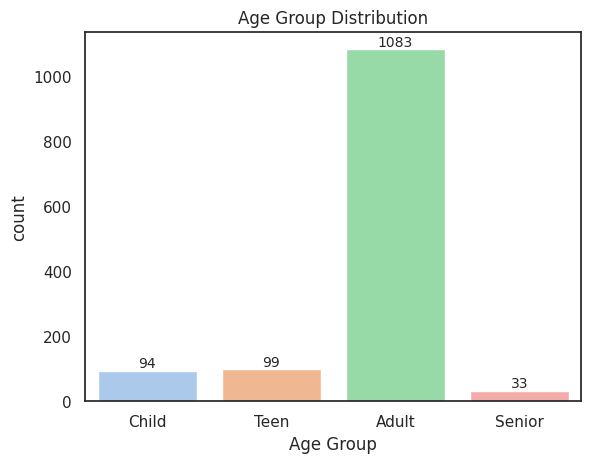

In [135]:
age_gr = sns.countplot(x = 'AgeGroup', data =df, order = ['Child', 'Teen', 'Adult', 'Senior'], palette ='pastel')
for i in age_gr.containers:
    age_gr.bar_label(i, label = 'edge', fontsize =10)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.show()

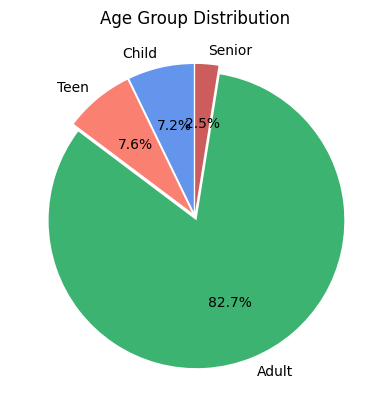

In [36]:
Age_Order = ['Child', 'Teen', 'Adult', 'Senior']
df['AgeGroup'].value_counts().reindex(Age_Order).plot(kind = 'pie', startangle = 90,autopct='%1.1f%%',
                                   colors =['cornflowerblue', 'salmon', 'mediumseagreen', 'indianred'],
                                   explode = (0.03, 0.03, 0.03, 0.03),
                                   labels = ['Child', 'Teen', 'Adult', 'Senior'])
plt.title('Age Group Distribution')
plt.ylabel('')
plt.show()

In [37]:
df['Age'].describe()

,Age
count,1309.0
mean,29.503183
std,12.905246
min,0.1667
25%,22.0
50%,28.0
75%,35.0
max,80.0


Age column analysis:
1. Age ranges from 0.17 to 80 years.
2. The mean age is around 29-30, with most passengers between 20 and 40.
3. The distribution is slightly right-skewed.
4. Some very young and very old passengers may be considered outliers. I count that total outliers number is 101.
5. Creating age groups (e.g., Child, Teen, Adult, Senior) can help in deeper analysis. For example:

    *   The **Adult** group makes up **82.7%** of the passengers.
    *   Followed by **Teen** with **7.6%**.
    *   **Child** with **7.2%**.
    *   **Senior** with **5%**.







##SibSp

In [38]:
df['Sibsp'].value_counts().sort_index()

,count
Sibsp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


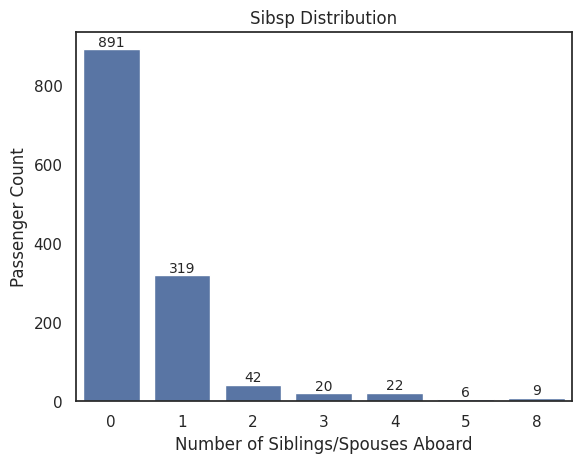

In [136]:
sib_plot = sns.countplot(x = 'Sibsp', data= df, order =[0,1,2,3,4,5,8])
for i in sib_plot.containers:
    sib_plot.bar_label(i, label = 'edge', fontsize = 10)
plt.title ('Sibsp Distribution')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Passenger Count')
plt.show()

According to the chart:
1. The majority of passengers (~900) had no siblings or spouses aboard (SibSp = 0).
2. About 320 passengers had 1 sibling or spouse with them.
3. Very few passengers had 2 or more relatives aboard:

  *   SibSp = 2 → small group (~42 people)
  *   SibSp = 3–5 or 8 → extremely rare cases, indicating larger families traveling together.
4. The distribution of data is right skewed.

Therefore, most people traveled alone or with just one close family member.Higher SibSp values are rare and may represent extended families.





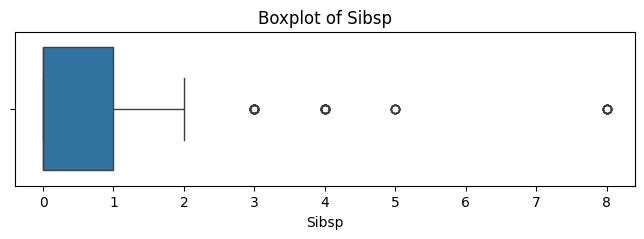

In [40]:
plt.figure(figsize=(8,2))
sns.boxplot(x = df['Sibsp'])
plt.title ('Boxplot of Sibsp')
plt.show()

According to the boxplot chart, there are several outliers.

In [41]:
# Categorize Sibsp column with "Alone" and "With Family"
df['TravelAlone'] = df['Sibsp'].apply(lambda x: 'Alone' if x ==0 else 'With Family')
df['TravelAlone'].value_counts()

,count
TravelAlone,
Alone,891
With Family,418


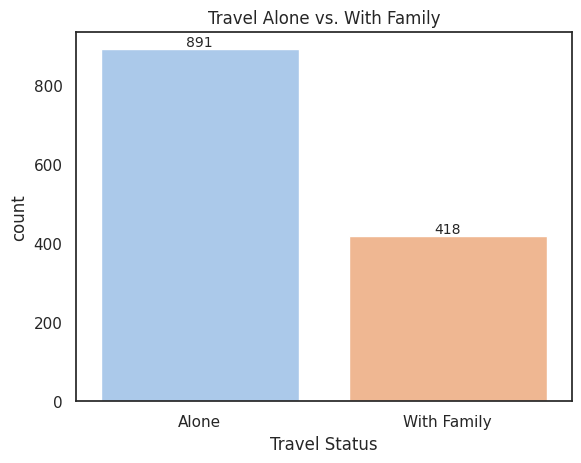

In [137]:
warnings.filterwarnings('ignore')
tr_alone = sns.countplot(x = 'TravelAlone', data = df,palette='pastel')
for i in tr_alone.containers:
    tr_alone.bar_label(i, label ='edge', fontsize =10)
plt.title('Travel Alone vs. With Family')
plt.xlabel('Travel Status')
plt.show()

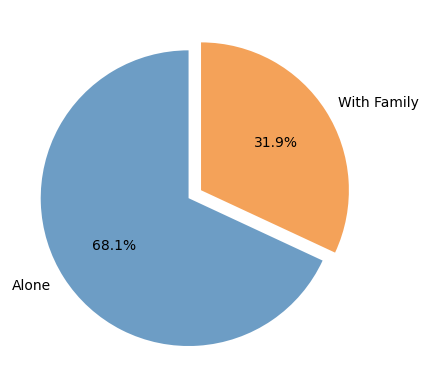

In [43]:
df['TravelAlone'].value_counts().plot(kind ='pie', startangle = 90,autopct='%1.1f%%',
                                      colors =['#6D9DC5', '#F4A259'],
                                      explode = (0.05, 0.05))
plt.ylabel('')
plt.show()

Accorging to analysis:

    *   68.1% of passengers travelled alone.
    *   31.9% of passengers travelled with family.
This indicates an imbalance in the data, with most passengers traveling alone.



## Parch

In [44]:
df['Parch'].value_counts().sort_index()

,count
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


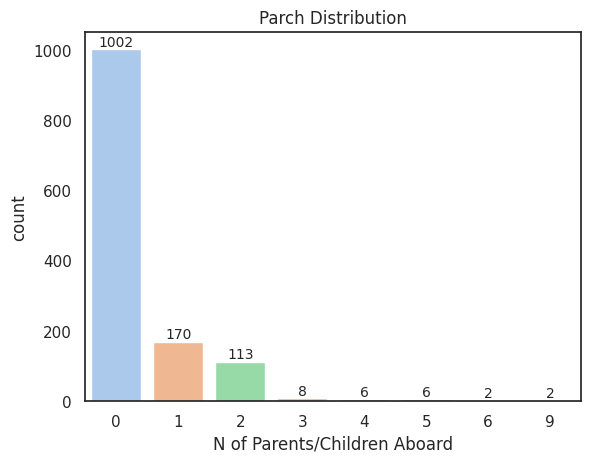

In [138]:
parch_plot = sns.countplot(x = 'Parch', data =df, palette = 'pastel')
for i in parch_plot.containers:
    parch_plot.bar_label(i, label = 'edge', fontsize =10)
plt.title('Parch Distribution')
plt.xlabel('N of Parents/Children Aboard')
plt.show()

Parch distribution is right skewed. Most of passengers did not traveled with parents or children. Only 170 passengers have 1 parent or child. Also, large family groups (3 or more) were rare.
Let's categorize Parch column with values "Alone" and "With Family" and analyse.

In [46]:
df['Parch_Group'] = df['Parch'].apply(lambda x: 'Alone' if x==0 else 'With Family')
df['Parch_Group'].value_counts(normalize=True)*100

,proportion
Parch_Group,
Alone,76.546982
With Family,23.453018


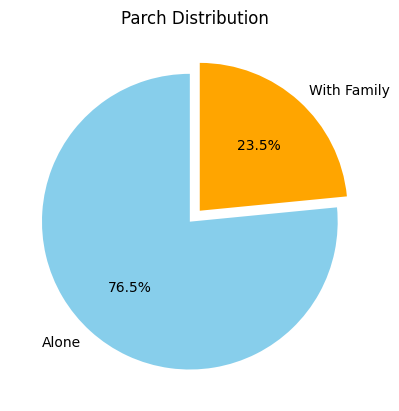

In [47]:
df['Parch_Group'].value_counts().plot(kind='pie', autopct = '%1.1f%%',
                                      startangle =90,
                                      colors = ['skyblue','orange'],
                                      labels = ['Alone', 'With Family'],
                                      explode = (0.05, 0.05))
plt.title('Parch Distribution')
plt.ylabel('')
plt.show()

According to analysis:

    *  There is a clear imbalance in the Parch data.
    *  Most passengers (about 77%) had no parents or children aboard.
    *   Only a small portion of passengers traveled with 1 or more family members in this category.
This imbalance may affect how the model interprets the impact of traveling with family on survival.





## Fare

In [48]:
df['Fare'].describe()

,Fare
count,1309.0
mean,33.281086
std,51.741501
min,0.0
25%,7.8958
50%,14.4542
75%,31.275
max,512.329224


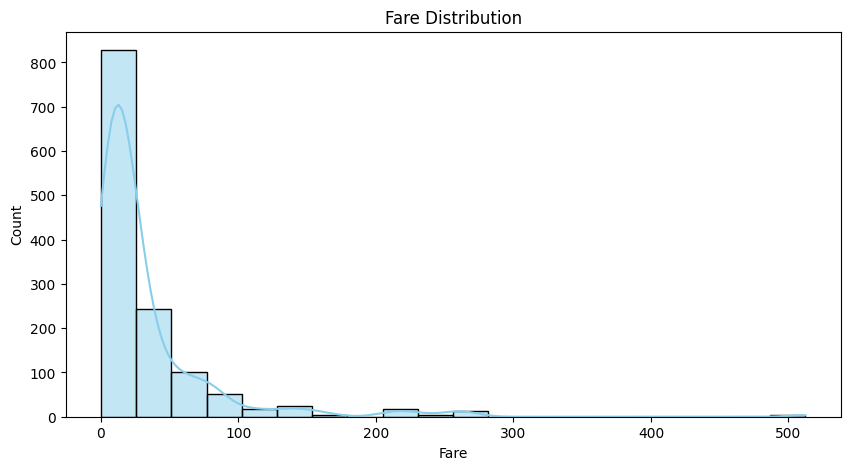

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'], bins=20, color='skyblue',kde = True)
plt.title('Fare Distribution')
plt.show()


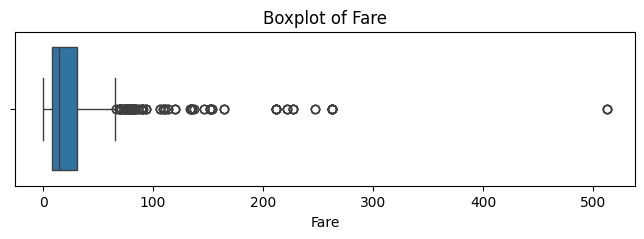

In [50]:
plt.figure(figsize=(8,2))
sns.boxplot(x = df['Fare'])
plt.title('Boxplot of Fare')
plt.show()

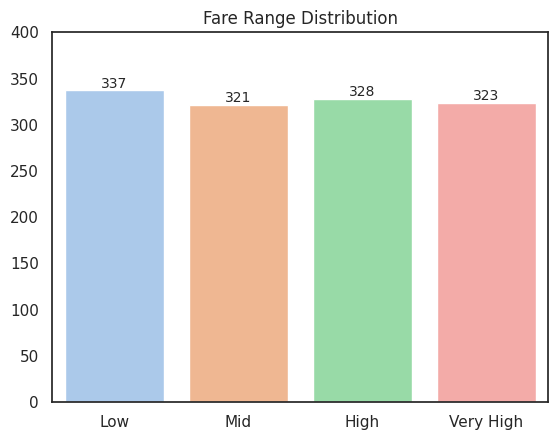

In [152]:
Fr_range = sns.countplot(data =df, x = 'Fare_Range', palette ='pastel')
for i in Fr_range.containers:
    Fr_range.bar_label(i, label = 'edge', fontsize =10)
plt.title ('Fare Range Distribution')
plt.ylim([0,400])
plt.ylabel('')
plt.xlabel('')
plt.show()

<Axes: ylabel='count'>

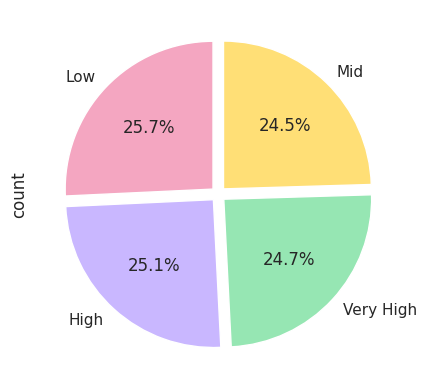

In [161]:
df['Fare_Range'].value_counts().plot(kind ='pie',  autopct = '%1.1f%%',
                                      startangle =90,
                                      colors = ['#f4a6c1', '#c9b7ff', '#96e6b3', '#ffdf76'],
                                      explode = (0.05, 0.05, 0.05, 0.05))

In [51]:
# Count Outliers:
Q1_Fare = df['Fare'].quantile(0.25)
Q2_Fare = df['Fare'].quantile(0.75)
IQR_Fare = Q2_Fare - Q1_Fare

Fare_Outliers = df[(df['Fare']< Q1_Fare - 1.5* IQR_Fare) | (df['Fare']> Q2_Fare + 1.5 * IQR_Fare)]
Fare_Outliers_Count = Fare_Outliers.shape[0]

print(f"There are {Fare_Outliers_Count} outliers in the Fare column")

There are 171 outliers in the Fare column


According to the IQR method, I identified 171 outliers in the Fare column. These outliers represent unusually high ticket prices and could affect the model. I may consider capping, removing, or transforming them depending on the model's sensitivity to outliers.

## Embarked     

In [52]:
df['Embarked'].value_counts()

,count
Embarked,
S,916
C,270
Q,123


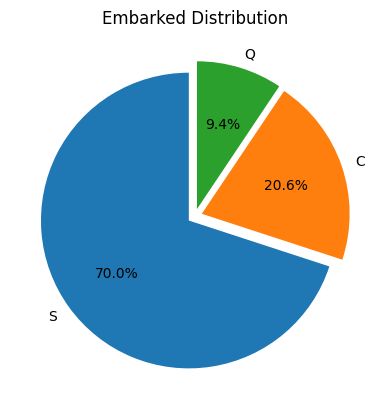

In [53]:
df['Embarked'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%',
                                   startangle = 90, color = ['skyblue', 'lightgreen', 'lightcoral'],
                                   explode = (0.05, 0.05, 0.05))
plt.title('Embarked Distribution')
plt.ylabel('')
plt.show()

Most passengers (70%) boarded from Southampton (S), followed by Cherbourg (C) and Queenstown (Q). This suggests that Southampton was the primary departure port. This feature might be useful when analyzing survival or class distribution by embarkation point.

## Deck         

In [54]:
df['Deck'].value_counts().sort_index()

,count
Deck,
A,22
B,65
C,94
D,46
E,41
F,21
G,5
No Cabin,1014
T,1


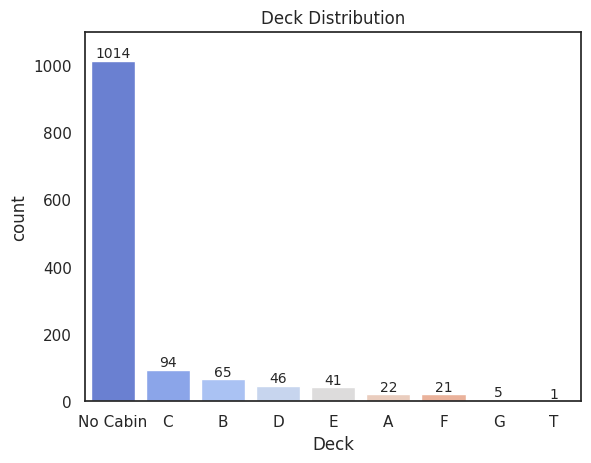

In [164]:
deck_plot = sns.countplot(x = 'Deck', data = df, order = df['Deck'].value_counts().index, palette = 'coolwarm')
for i in deck_plot.containers:
    deck_plot.bar_label(i, label ='edge', fontsize =10)
plt.title('Deck Distribution')
plt.ylim([0,1100])
plt.xlabel('Deck')
plt.show()

 The majority of passengers had no recorded cabin ("No Cabin"). Among those who had cabins, most were located on Deck C, B, and D. Decks A - G were the least common. This likely reflects passenger class and access to better facilities.

#📊 Bivariate Analysis (vs Survived)

## Pclass vs Survived

In [56]:
df.groupby('Pclass')['Survived'].agg(['mean','sum'])

,mean,sum
Pclass,,
1,0.619195,200
2,0.429603,119
3,0.255289,181


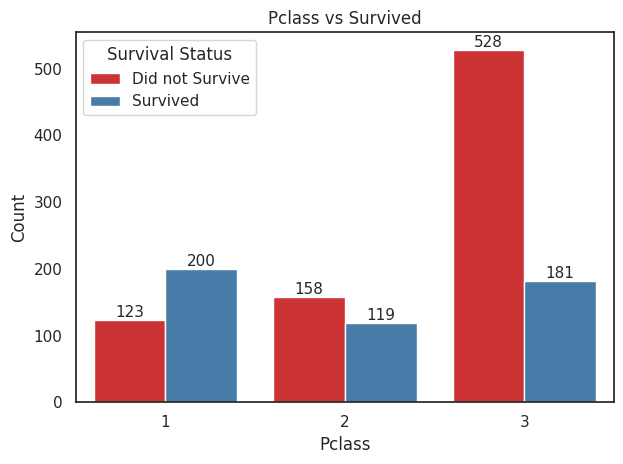

In [57]:
warnings.filterwarnings('ignore')
sns.set(style = 'white')
plot = sns.countplot( x='Pclass', hue = 'Survived', data = df, palette = 'Set1')
for containers in plot.containers:
    plot.bar_label(containers, label = 'edge', fontsize = 11)
plot.legend(title = 'Survival Status', labels = ['Did not Survive', 'Survived'] )
plt.title('Pclass vs Survived')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This bar chart shows the number of passengers who survived and those who did not survive.

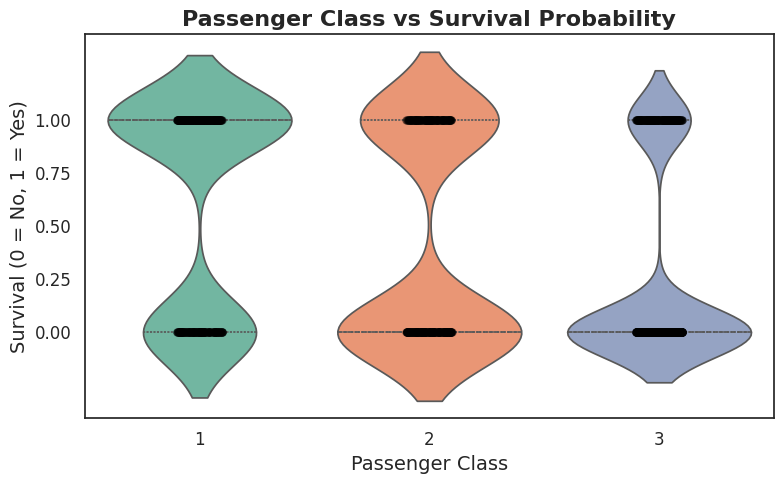

In [165]:
warnings.filterwarnings('ignore')

sns.set(style="white")

plt.figure(figsize=(8, 5))
sns.violinplot(
    x='Pclass',
    y='Survived',
    data=df,
    inner='quartile',
    palette='Set2',
    scale='count'
)
sns.stripplot( x ='Pclass', y = 'Survived', data = df, color ='black',jitter= True,  alpha = 0.5, size= 6)

plt.title('Passenger Class vs Survival Probability', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival (0 = No, 1 = Yes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=12)
plt.tight_layout()
plt.show()

The violin chart shows probability of survival distributed for each passenger class. The width of the violin at each y-value shows the density (how frequent values are). Wider sections mean more data points around that value. This chart helps understand how the data is spread out. Acconding to this example:

    *   More 1st-class passengers survived compared to 2nd and 3rd class.
    *   3rd-class passengers had a lower survival rate, with more density near Survived = 0.
    *   The distribution clearly shows that higher-class passengers had a better chance of survival.






The passenger class (Pclass) plays a significant role in survival.
The probability of survival was notably higher among 1-st class passengers, while it was considerably lower for those in 3rd class. This stark difference highlights the strong influence of passenger class on survival chances during the Titanic disaster.

## Sex vs Survived

In [59]:
df.groupby(['Sex','Survived']).size().unstack()

Survived,0,1
Sex,,
0,682,161
1,127,339


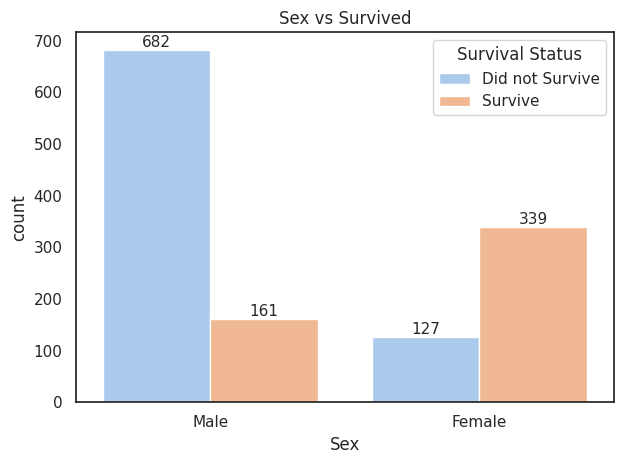

In [60]:
plot_sex = sns.countplot(x= 'Sex', hue= 'Survived', data= df, palette = 'pastel')
for containers in plot_sex.containers:
    plot_sex.bar_label(containers, label ='edge', fontsize = 11)
plot_sex.legend(title = 'Survival Status',labels =['Did not Survive', 'Survive'])
plt.title('Sex vs Survived')
plt.xlabel('Sex'),
plt.xticks([0,1],['Male','Female'])
plt.tight_layout()
plt.show()

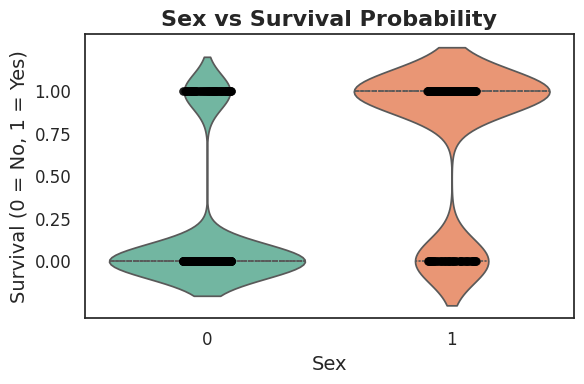

In [168]:
warnings.filterwarnings('ignore')

sns.set(style="white")

plt.figure(figsize=(6, 4))
sns.violinplot(
    x='Sex',
    y='Survived',
    data=df,
    inner='quartile',
    palette='Set2',
    scale='count'
)
sns.stripplot( x ='Sex', y = 'Survived', data = df, color ='black',jitter= True,  alpha = 0.5, size= 6)

plt.title('Sex vs Survival Probability', fontsize=16, fontweight='bold')
plt.xlabel('Sex', fontsize=14)
plt.ylabel('Survival (0 = No, 1 = Yes)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks([0, 0.25, 0.5, 0.75, 1], fontsize=12)
plt.tight_layout()
plt.show()

Acconring to this analysis, mots of men died after the Tinanic disaster and most women survived.

## Age vs Survived

In [61]:
df.groupby(['AgeGroup', 'Survived']).size().unstack()

Survived,0,1
AgeGroup,,
Child,40,54
Teen,58,41
Adult,686,397
Senior,25,8


In [62]:
df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,809.0,29.947567,12.223841,0.3333,23.0,28.0,35.0,74.0
1,500.0,28.784168,13.920034,0.1667,21.75,28.0,36.0,80.0


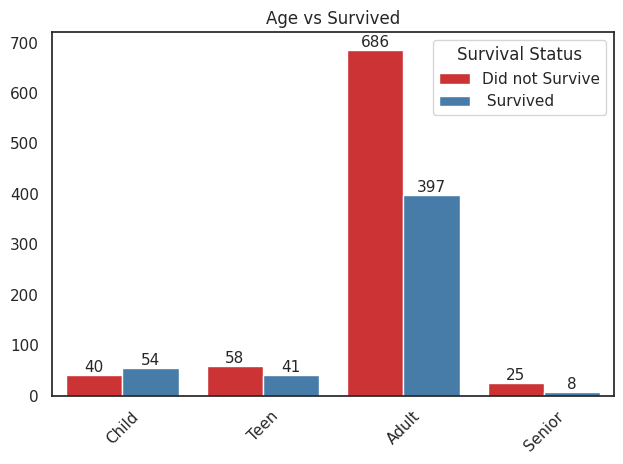

In [63]:
sns.set(style = 'white')
plot_age = sns.countplot(x = 'AgeGroup', hue = 'Survived', data = df, palette = 'Set1')
for i in plot_age.containers:
    plot_age.bar_label(i, label = 'edge', fontsize = 11)
plot_age.legend(title = 'Survival Status', labels = ['Did not Survive',' Survived'])

plt.title ('Age vs Survived')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

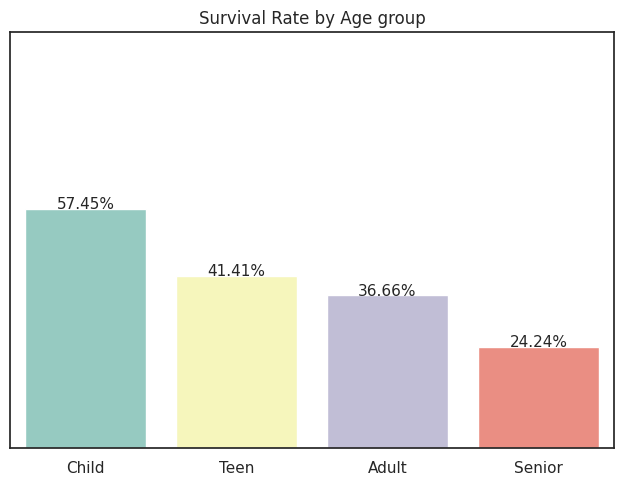

In [64]:
survival_rate_age = df.groupby('AgeGroup')['Survived'].mean()

plot_age_rate = sns.barplot(x = survival_rate_age.index, y = survival_rate_age.values, palette = 'Set3')
for i , rate in enumerate(survival_rate_age):
    plt.text(i, rate , f"{rate:.2%}", ha='center', fontsize=11)
plt.xlabel('')
plt.ylim(0, 1)
plt.yticks([])
plt.tight_layout()
plt.title('Survival Rate by Age group')
plt.show()

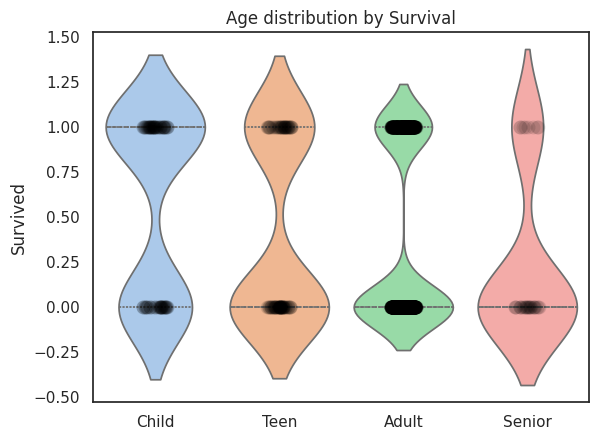

In [65]:
sns.violinplot( x = 'AgeGroup', y = 'Survived', data = df, palette = 'pastel',inner='quartile',  scale = 'count')
sns.stripplot(x= 'AgeGroup', y = 'Survived', data =df, jitter = True,  alpha = 0.1, size= 10, color = 'black')
plt.title('Age distribution by Survival')
plt.xlabel('')
plt.show()

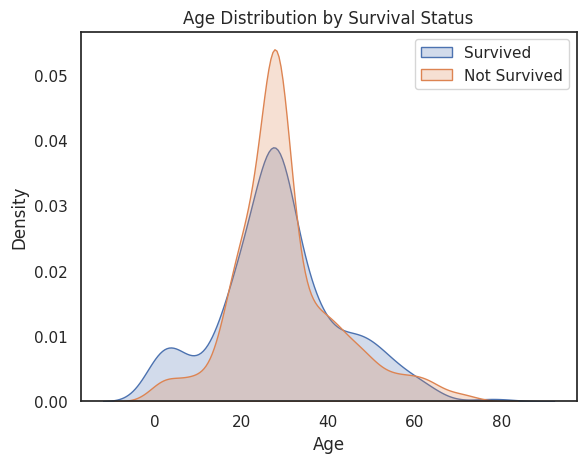

In [66]:
sns.kdeplot(data = df[df['Survived']==1]['Age'], label = 'Survived', shade = True)
sns.kdeplot(data =df[df['Survived']== 0]['Age'], label = 'Not Survived', shade = True)
plt.legend()
plt.title ('Age Distribution by Survival Status')
plt.show()

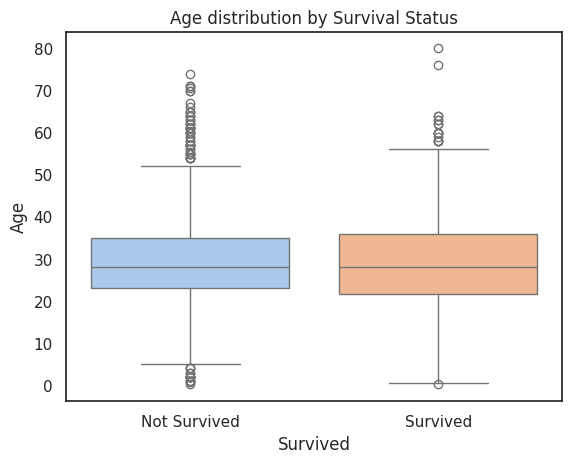

In [67]:
sns.boxplot(x = 'Survived', y ='Age', data = df, palette = 'pastel')
plt.title('Age distribution by Survival Status')
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.show()


The boxplot illustrates the distribution of ages for passengers who survived versus those who did not survive the Titanic disaster.

Not Survived (Blue):

*   The age distribution for passengers who did not survive is slightly skewed towards older passengers.
*   The median age (represented by the horizontal line inside the box) is around 30 years.
*   There are outliers (points outside the whiskers), which represent passengers with significantly higher and lower ages.

Survived (Orange):

*   The age distribution for survivors is more centered around younger ages, with the median around 30 years, similar to those who did not survive.
*   However, there seems to be a slightly lower spread in age for survivors, meaning most of the survivors were within a specific age range compared to those who did not survive.
*   The presence of outliers shows a few older survivors, but the spread is less extreme compared to the non-survivors.

Thus,

*   Both groups have overlapping median ages, suggesting that age alone was not the sole factor determining survival.
*   The younger passengers had a slightly higher survival rate, though age was not the only deciding factor.
*   Older passengers seemed to have a lower chance of survival, which is reflected in the higher age outliers in the non-survived group.













## SibSp vs Survived

In [68]:
df.groupby(['TravelAlone', 'Survived']).size().unstack()

Survived,0,1
TravelAlone,,
Alone,582,309
With Family,227,191


In [69]:
df.groupby('Survived')['Sibsp'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,809.0,0.521632,1.210449,0.0,0.0,0.0,1.0,8.0
1,500.0,0.462000,0.685197,0.0,0.0,0.0,1.0,4.0


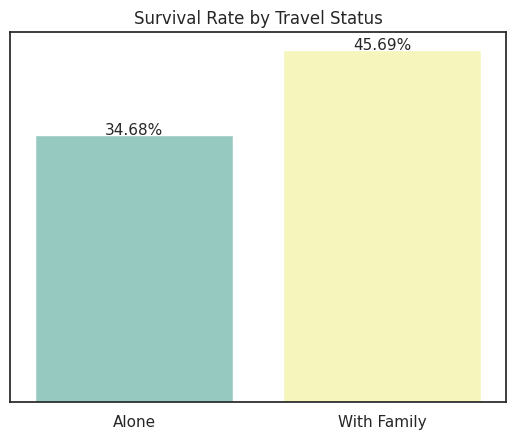

In [70]:
travel_rate = df.groupby('TravelAlone')['Survived'].mean()*100
travel_rate = df.groupby('TravelAlone')['Survived'].mean()*100
sns.barplot( x= travel_rate.index, y = travel_rate.values, palette = 'Set3')
for i, rate in enumerate(travel_rate):
    plt.text(i , rate, f"{rate:.2f}%", ha ='center', fontsize = 11)
plt.title('Survival Rate by Travel Status')
plt.yticks([])
plt.xlabel('')
plt.show()

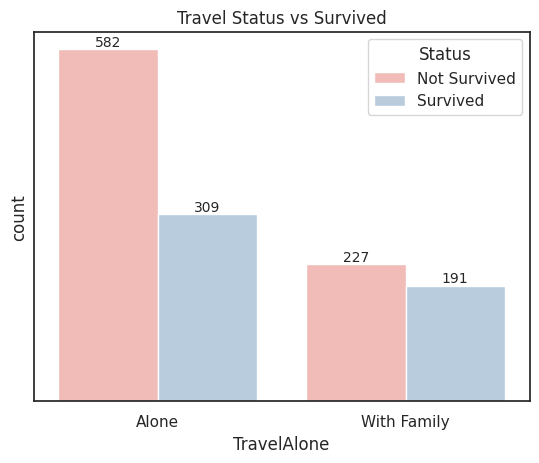

In [71]:
plot_sib = sns.countplot(x = 'TravelAlone', hue ='Survived', data = df, palette = 'Pastel1')

for i in plot_sib.containers:
    plot_sib.bar_label(i, label = 'edge', fontsize =10)
plt.legend(title = 'Status', labels = ['Not Survived', 'Survived'] )
plt.title('Travel Status vs Survived')
plt.yticks([])
plt.show()

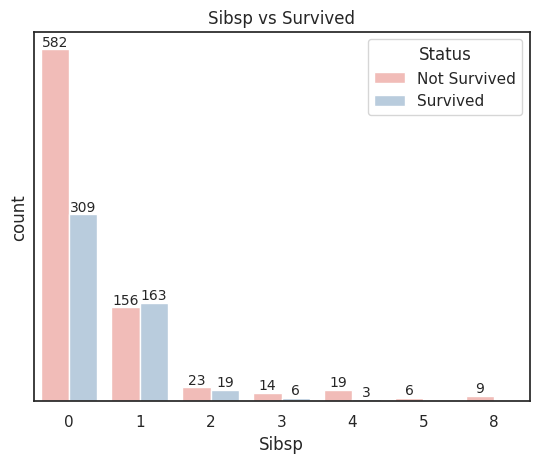

In [72]:
plot_sib = sns.countplot(x = 'Sibsp', hue ='Survived', data = df, palette = 'Pastel1')

for i in plot_sib.containers:
    plot_sib.bar_label(i, label = 'edge', fontsize =10)
plt.legend(title = 'Status', labels = ['Not Survived', 'Survived'] )
plt.title('Sibsp vs Survived')
plt.yticks([])
plt.show()

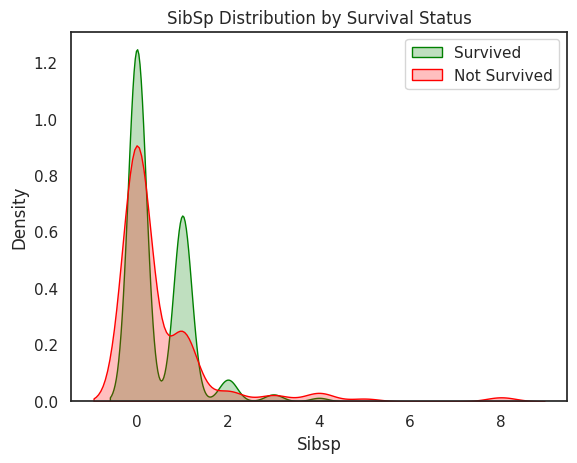

In [73]:
sns.kdeplot(data = df[df['Survived']==1]['Sibsp'], label = 'Survived', shade =True, color = 'green')
sns.kdeplot(data = df[df['Survived']==0]['Sibsp'], label = 'Not Survived', shade = True, color = 'red')
plt.legend()
plt.title('SibSp Distribution by Survival Status')
plt.show()

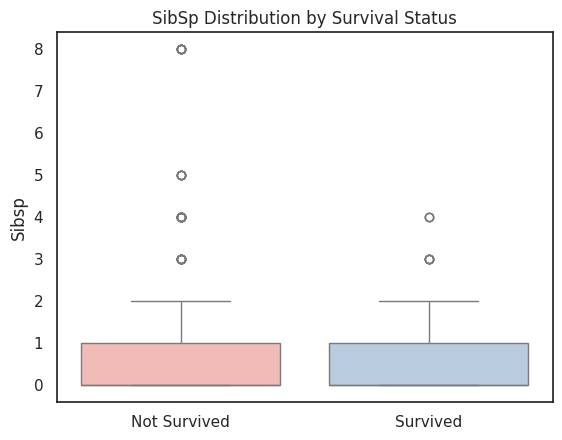

In [74]:
sns.boxplot(x = 'Survived', y = 'Sibsp', data =df, palette = 'Pastel1')
plt.title('SibSp Distribution by Survival Status')
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.xlabel('')
plt.show()

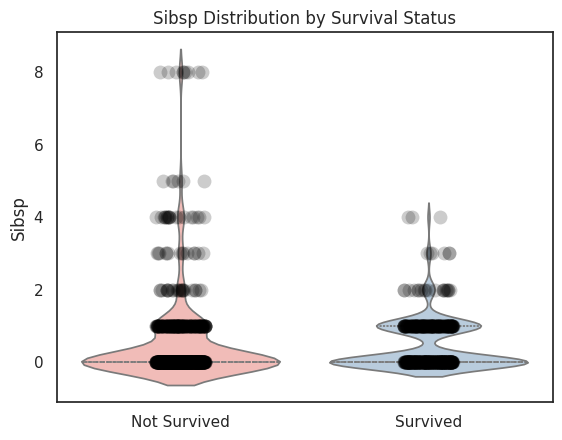

In [75]:
sns.violinplot(x= 'Survived', y ='Sibsp', data =df, palette= 'Pastel1', inner = 'quartile', scale ='count')
sns.stripplot(x= 'Survived', y = 'Sibsp', data =df, jitter = True, alpha =0.2, size =10, color = 'black')
plt.title('Sibsp Distribution by Survival Status')
plt.xlabel('')
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.show()

In this violin plot, I can observe the distribution of the SibSp variable, which represents the number of siblings or spouses aboard the Titanic, grouped by survival status (Survived vs. Not Survived).

**Not Survived:**

*   The distribution for passengers who did not survive is heavily concentrated around 0 siblings/spouses (meaning most passengers who did not survive had no siblings or spouses aboard).
*   There is a small proportion of passengers with 1 to 4 siblings/spouses, and a few extreme values reaching up to 8 or more.

**Survived:**

*   Passengers who survived show a similar concentration at 0 siblings/spouses but with a more spread-out distribution compared to those who did not survive.
*   There is a noticeable presence of passengers with 1 to 2 siblings/spouses who survived, suggesting that having family aboard may have influenced survival chances.

This plot shows a distinct pattern where passengers with fewer siblings or spouses were more likely to survive. However, a deeper statistical analysis might be necessary to confirm whether there is a significant correlation between the number of siblings/spouses aboard and the likelihood of survival.





## Parch vs Survived  

In [76]:
df['Parch'].value_counts().sort_index()

,count
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


In [77]:
df.groupby(['Parch','Survived']).size().unstack()

Survived,0,1
Parch,,
0,666.0,336.0
1,70.0,100.0
2,56.0,57.0
3,3.0,5.0
4,5.0,1.0
5,5.0,1.0
6,2.0,NaN
9,2.0,NaN


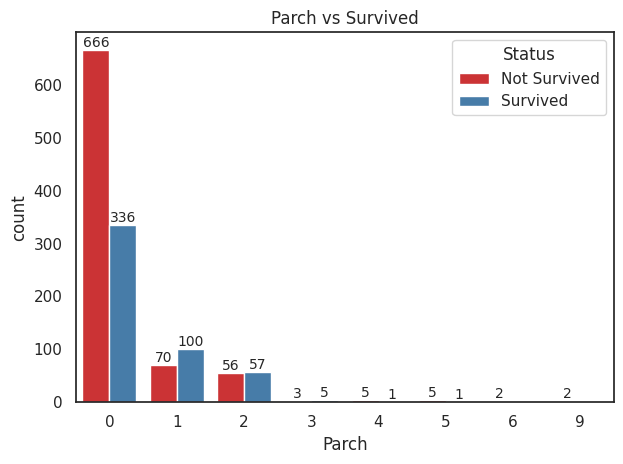

In [78]:
plot_Parch = sns.countplot(x = 'Parch', hue = 'Survived', data = df, palette = 'Set1')
for i in plot_Parch.containers:
    plot_Parch.bar_label(i, label = 'edge', fontsize =10)
plt.legend(title = 'Status', labels =['Not Survived', 'Survived'])
plt.title('Parch vs Survived')
plt.tight_layout()
plt.show()

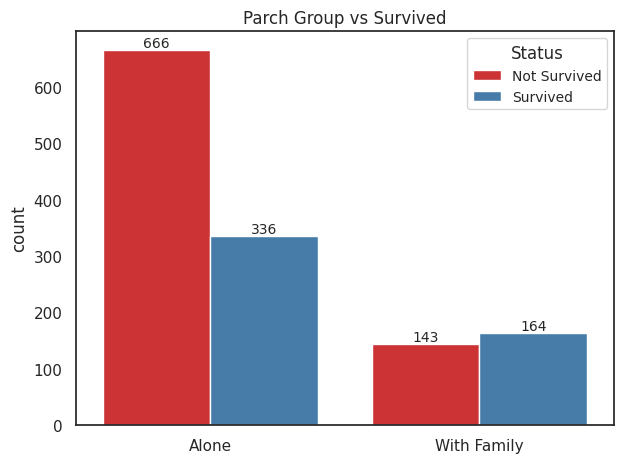

In [79]:
plot_parchgr = sns.countplot( x= 'Parch_Group', hue ='Survived', data =df, palette = 'Set1')
for i in plot_parchgr.containers:
    plot_parchgr.bar_label(i, label = 'edge', fontsize =10)
plot_parchgr.legend (title = 'Status', labels = ['Not Survived', 'Survived'], fontsize = 10)
plt.xlabel('')
plt.title('Parch Group vs Survived')
plt.tight_layout()
plt.show()

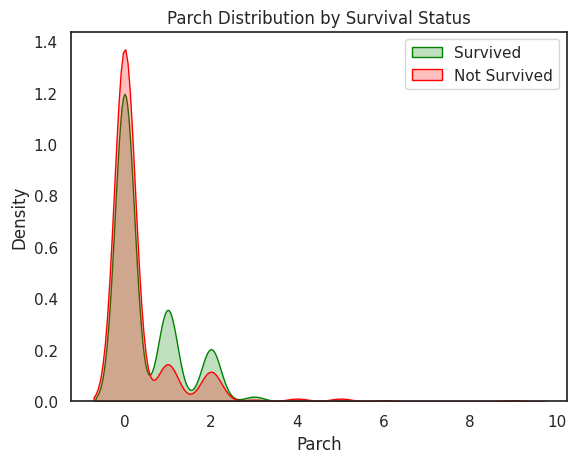

In [80]:
sns.kdeplot(data = df[df['Survived']==1], x = 'Parch', label = 'Survived', shade = True, color = 'green')
sns.kdeplot(data = df[df['Survived']==0], x = 'Parch', label = 'Not Survived', shade = True, color = 'red')
#plt.legend(title = 'Status', labels = ['Survived','Not Survived'])
plt.legend()
plt.title ('Parch Distribution by Survival Status')
plt.show()

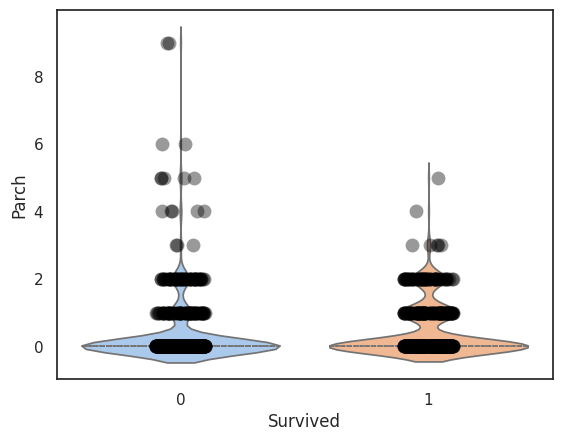

In [81]:
sns.violinplot( x = 'Survived', y = 'Parch', data =df, inner = 'quartile', palette = 'pastel', scale = 'count')
sns.stripplot(x = 'Survived', y= 'Parch', data = df, jitter = True, alpha = 0.4, size =10, color ='black')
plt.show()

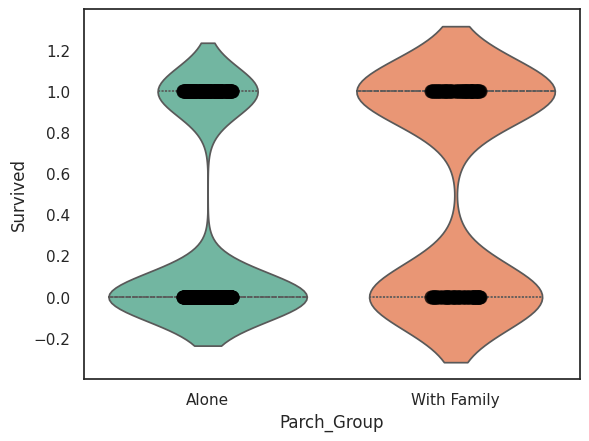

In [82]:
sns.violinplot( x = 'Parch_Group', y = 'Survived', data =df, inner = 'quartile', palette = 'Set2', scale = 'count')
sns.stripplot(x = 'Parch_Group', y= 'Survived', data = df, jitter = True, alpha = 0.4, size =10, color ='black')
plt.show()

Most of the passengers who were on board with their families survived. In contrast, the majority of those who were alone on the ship did not survive. This trend is likely related to their travel class, as many of them were in third class. It is also suspected that some of these solo passengers may have been smuggled onto the ship.

## Fare vs Survived

In [83]:
df.groupby('Survived')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,809.0,23.342827,34.125393,0.0,7.8542,10.5,26.0,263.0
1,500.0,49.361187,68.648796,0.0,11.2146,26.0,57.75,512.329224


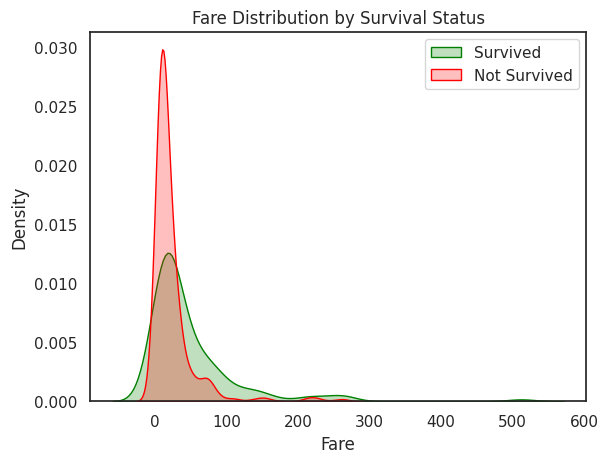

In [84]:
sns.kdeplot(x='Fare', data = df[df['Survived']==1], label = 'Survived', shade = True, color = 'green')
sns.kdeplot(x = 'Fare', data = df[df['Survived']==0], label = 'Not Survived', shade = True, color = 'red')
plt.legend()
plt.title('Fare Distribution by Survival Status')
plt.show()

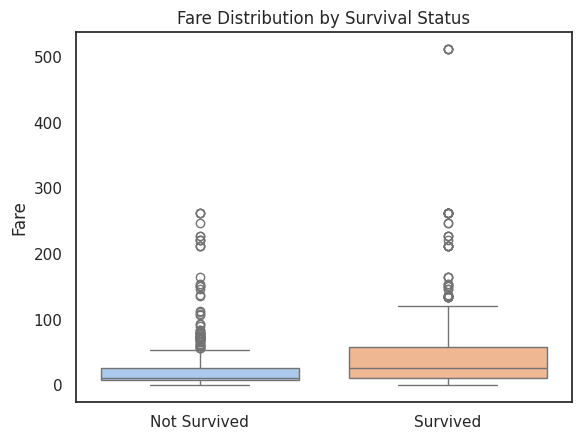

In [85]:
sns.boxplot(x = 'Survived', y = 'Fare', data =df, palette = 'pastel')
plt.title('Fare Distribution by Survival Status')
plt.xticks([0,1],['Not Survived', 'Survived'])
plt.xlabel('')
plt.show()

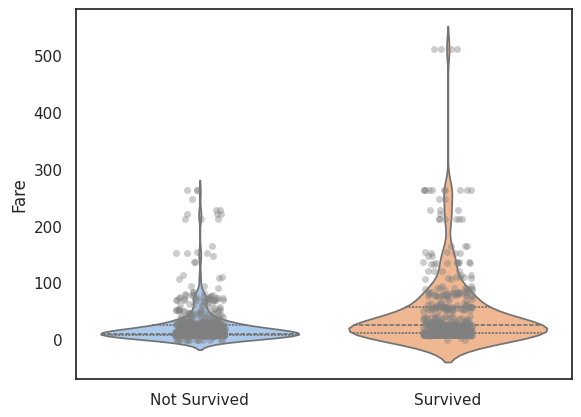

In [86]:
sns.violinplot(x='Survived', y='Fare', data=df, inner = 'quartile', palette = 'pastel', scale= 'count')
sns.stripplot(x='Survived', y='Fare', data =df, jitter = True, alpha = 0.4, size =5, color ='grey')
plt.xlabel('')
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()

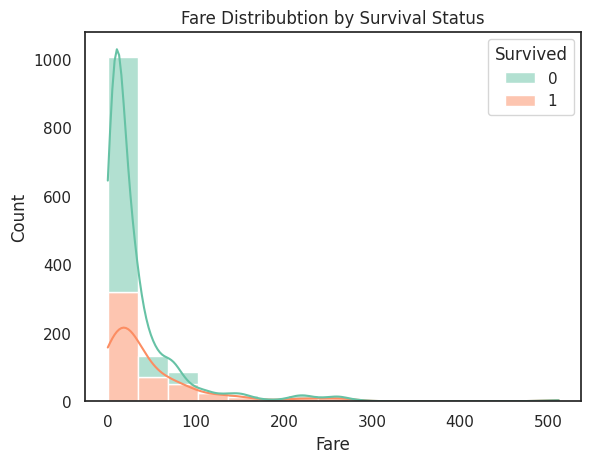

In [87]:
sns.histplot(data= df, x='Fare', hue = 'Survived', kde= True, bins =15, palette = 'Set2', legend= True ,multiple ='stack')
plt.title('Fare Distribubtion by Survival Status')
plt.show()

In [88]:
df['Fare_Range'] = pd.qcut(df['Fare'], q=4, labels=['Low', 'Mid', 'High', 'Very High'])
df.groupby(['Fare_Range','Survived']).size().unstack()

Survived,0,1
Fare_Range,,
Low,260,77
Mid,230,91
High,185,143
Very High,134,189


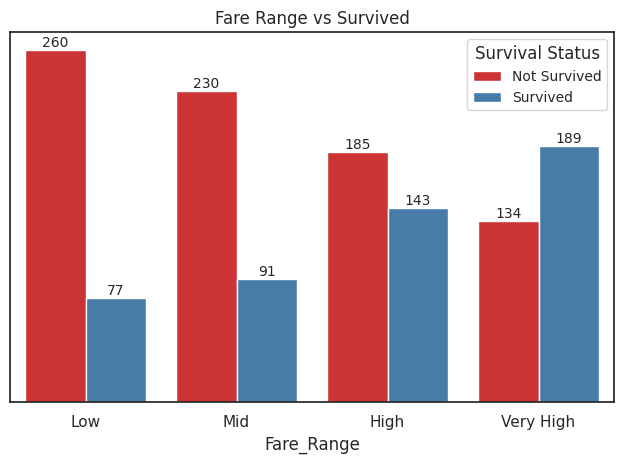

In [89]:
sns.set(style="white")
plot_fare = sns.countplot(x='Fare_Range', hue ='Survived', data =df, palette ='Set1')
for i in plot_fare.containers:
    plot_fare.bar_label(i,  label='edge', fontsize =10)
plt.legend(title ='Survival Status', labels =['Not Survived', 'Survived'], fontsize =10)
plt.title('Fare Range vs Survived')
plt.ylabel('')
plt.yticks([])
plt.tight_layout()
plt.show()

The Fare variable shows a clear distinction between survivors and non-survivors. Visualizations such as boxplots, violin plots, and KDE plots reveal that passengers who paid higher fares had a greater chance of survival.

## Embarked vs Survival

In [90]:
df.groupby(['Embarked','Survived']).size().unstack()

Survived,0,1
Embarked,,
C,120,150
Q,79,44
S,610,306


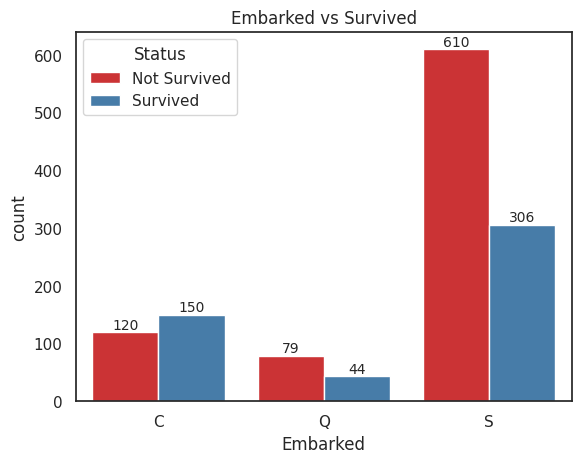

In [91]:
plot_em = sns.countplot(x='Embarked', hue ='Survived', data= df, palette ='Set1')
for i in plot_em.containers:
    plot_em.bar_label(i, label =['edge'], fontsize =10)
plt.legend(title='Status', labels =['Not Survived', 'Survived'])
plt.title('Embarked vs Survived')

plt.show()

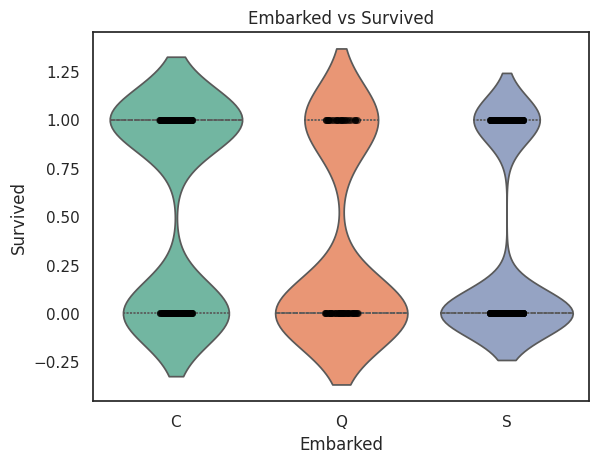

In [92]:
sns.violinplot(x='Embarked', y ='Survived', data =df, palette ='Set2',scale='count', inner = 'quartile')
sns.stripplot(x = 'Embarked', y ='Survived', data =df, jitter =True, alpha= 0.4, size =5, color ='black')
plt.title('Embarked vs Survived')
plt.show()

The violin plot below illustrates the relationship between the embarkation port (Embarked) and survival outcome (Survived). Each violin represents the distribution of survivors (1) and non-survivors (0) for passengers who boarded at:
*   C = Cherbourg
*   Q = Queenstown
*   S = Southampton

**Cherbourg (C):**

*   Shows a higher density of survivors compared to non-survivors.
*   Indicates that a large proportion of passengers from Cherbourg survived.
*   This aligns with historical data, as many first-class passengers boarded at Cherbourg.

**Queenstown (Q):**

*   Surprisingly, Queenstown also shows a high survival rate, with a strong concentration at the 1 level.
*   This is interesting because most passengers from Queenstown were third-class, yet a significant number survived.
*   This may indicate a group or family-based factor or other situational variables.

**Southampton (S):**

*   The density is stronger at the non-survivor level (0), indicating that most passengers who boarded here did not survive.
*   Southampton had the largest number of third-class passengers, which likely contributed to this lower survival rate.

The embarkation port appears to have a noticeable correlation with survival, possibly influenced by class distribution and boarding conditions. Contrary to expectations, Queenstown shows a high survival rate, which could merit deeper investigation.















## Deck vs Survived

In [93]:
df.groupby(['Deck','Survived']).size().unstack()

Survived,0,1
Deck,,
A,11,11
B,18,47
C,37,57
D,14,32
E,11,30
F,8,13
G,2,3
No Cabin,707,307
T,1,0


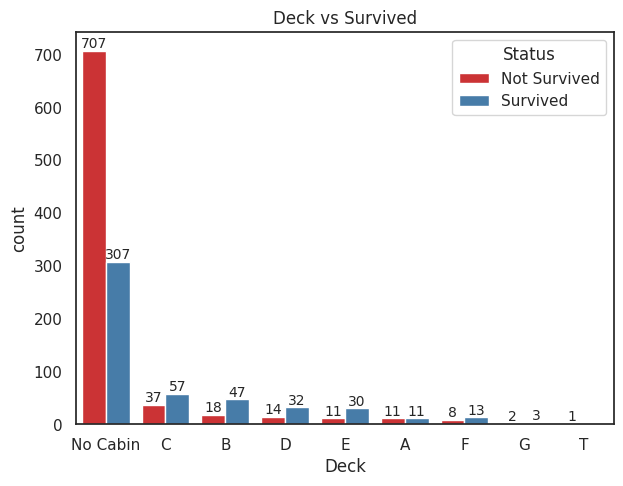

In [94]:
plot_Deck = sns.countplot(x = 'Deck', hue='Survived', data =df, palette ='Set1', order =df['Deck'].value_counts().index)
for i in plot_Deck.containers:
    plot_Deck.bar_label(i, label ='edge', fontsize = 10)
plt.legend(title ='Status', labels =['Not Survived', 'Survived'])
plt.tight_layout()
plt.title('Deck vs Survived')
plt.show()

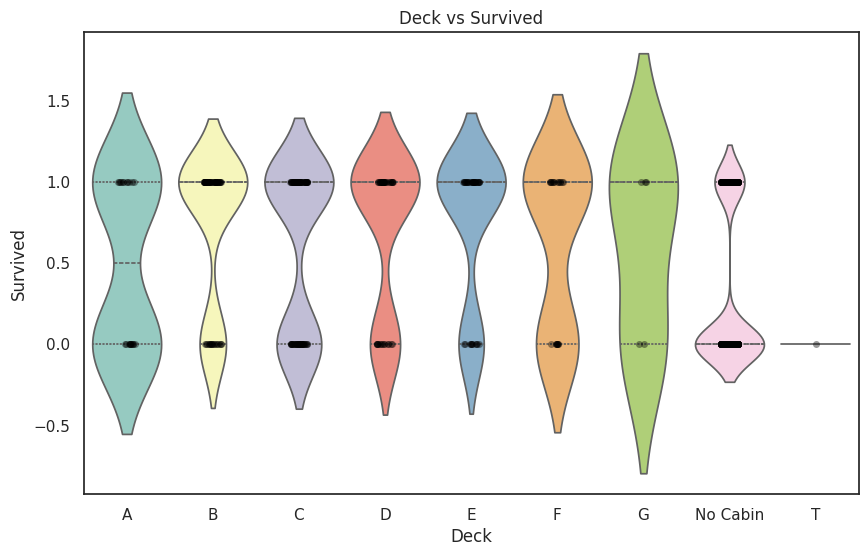

In [95]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Deck', y = 'Survived', data =df, inner ='quartile', scale = 'count', palette ='Set3')
sns.stripplot(x='Deck', y= 'Survived', data =df, alpha = 0.4, size =5, color ='black', jitter =True)
plt.title('Deck vs Survived')
plt.show()

It seems that most of the passengers who had a cabin number survived. Most of the passengers who did not have a cabin number died.

#📊 Multivariate Analysis

##Analyzing the Relationship Between Embarked, Pclass, and Survival








In this analysis, I explore how various factors, including the passenger's embarkation station and class, influenced the likelihood of survival on the Titanic. The goal of this analysis is to uncover patterns that could reveal whether certain passenger classes or embarkation stations were associated with a higher likelihood of survival.

**Key Questions:**

1.   **Did passengers in higher classes (Pclass 1) have a better chance of survival?**
2.   **Which embarkation station was associated with the highest survival rate?**
3.   **Were there significant differences in survival rates between passengers boarding at Cherbourg, Queenstown, or Southampton?**

By investigating these factors, I can gain valuable insights into the influence of class and embarkation location on survival chances during the Titanic disaster.

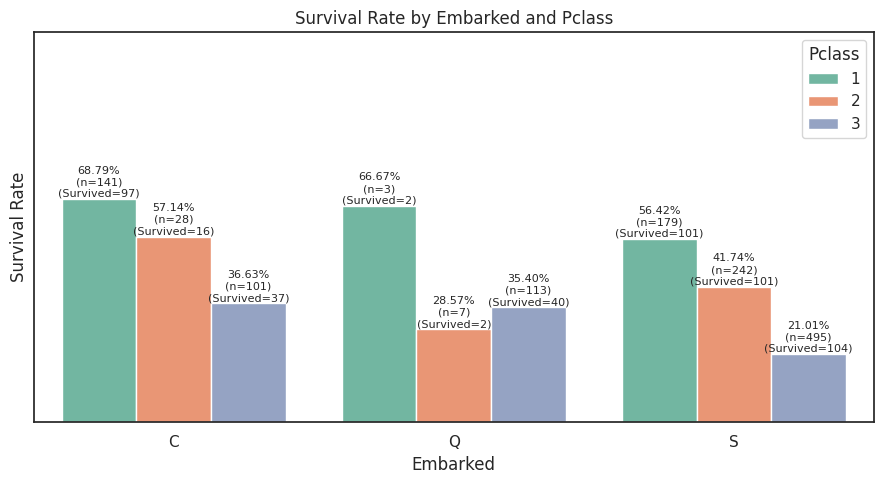

In [96]:
grouped_surv_rate = df.groupby(['Embarked','Pclass'])['Survived'].agg(['mean','count','sum'])
grouped_surv_rate = grouped_surv_rate.reset_index()
grouped_surv_rate.rename(columns = {'mean':'Survival Rate', 'count':'Passenger Count','sum': 'Survival Count'}, inplace = True)
grouped_surv_rate.sort_values(by=['Pclass'], inplace=True)
plt.figure(figsize=(9,5))
ax = sns.barplot(x='Embarked', y='Survival Rate', hue='Pclass', data=grouped_surv_rate, palette='Set2',  width=0.8)
for p, (_, row) in zip(ax.patches, grouped_surv_rate.iterrows()):
    height = p.get_height()
    count = row['Passenger Count']
    survived = int(row['Survival Count'])
    ax.annotate(f"{height:.2%}\n(n={count})\n(Survived={survived})",
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)
plt.ylim(0,1.2)
plt.yticks([])
plt.ylabel('')
plt.title('Survival Rate by Embarked and Pclass')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.show()




The graph above reveals some interesting trends regarding the probability of survival based on passenger class and embarkation station.

**Key Findings:**

1.   First-Class Passengers had the highest probability of survival across all embarkation stations. Specifically:
  * 68.79% of first-class passengers from station C survived.
  * 66.67% of first-class passengers from station Q survived (note: only one first-class passenger boarded from this station).
  * From station S, 56.42% of first-class passengers survived.
  
Notably, station C stood out as having the highest survival rate for first-class passengers, reinforcing the idea that higher-class passengers had a greater chance of survival.

2. Second- and Third-Class Passengers showed a much lower probability of survival across all stations. The survival rates for these classes were significantly lower compared to their first-class counterparts, indicating that passenger class played a crucial role in survival likelihood.

**Conclusion:**
While embarkation station does provide some interesting insights, it is evident that passenger class was a far more significant factor in determining survival probability. First-class passengers, regardless of their embarkation station, had a significantly higher chance of survival. In contrast, second- and third-class passengers had substantially lower survival rates, underscoring the importance of social class in the tragic events aboard the Titanic.



##Analyzing the Relationship Between Age Group, Pclass, and Survival

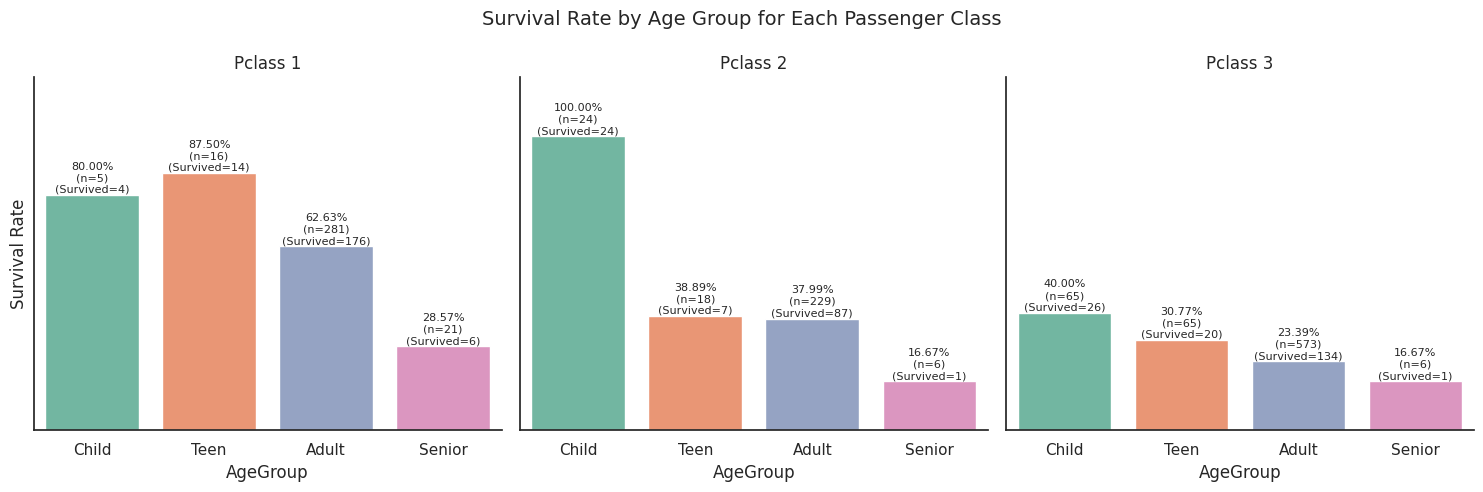

In [97]:
grouped_surv_rate_age = df.groupby(['AgeGroup','Pclass'])['Survived'].agg(['mean','count','sum'])
grouped_surv_rate_age = grouped_surv_rate_age.reset_index()
grouped_surv_rate_age.rename(columns = {'mean':'Survival Rate', 'count':'Passenger Count','sum': 'Survival Count'}, inplace = True)
grouped_surv_rate_age.sort_values(by=['Pclass'], inplace=True)
g1 = sns.catplot(
    data=grouped_surv_rate_age,
    x='AgeGroup',
    y='Survival Rate',
    col='Pclass',
    kind='bar',
    palette='Set2',
    height=5,
    aspect=1
)

# Annotate each bar
for ax, (_, df_sub) in zip(g1.axes.flat, grouped_surv_rate_age.groupby('Pclass')):
    for p, (_, row) in zip(ax.patches, df_sub.iterrows()):
        height = p.get_height()
        count = row['Passenger Count']
        survived = int(row['Survival Count'])
        ax.annotate(f"{height:.2%}\n(n={count})\n(Survived={survived})",
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', fontsize=8)
    ax.set_ylim(0, 1.2)
    ax.set_yticks([])  # Optional for cleaner look

g1.set_titles("Pclass {col_name}")
g1.fig.subplots_adjust(top=0.85)
g1.fig.suptitle("Survival Rate by Age Group for Each Passenger Class", fontsize=14)
plt.tight_layout()
plt.show()


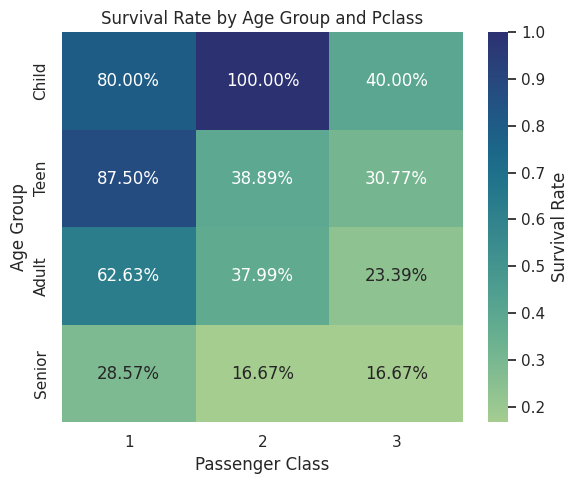

In [98]:
# Pivot for heatmap
pivot_data = grouped_surv_rate_age.pivot(index='AgeGroup', columns='Pclass', values='Survival Rate')

plt.figure(figsize=(6, 5))
sns.heatmap(pivot_data, annot=True, fmt=".2%", cmap="crest", cbar_kws={'label': 'Survival Rate'})
plt.title("Survival Rate by Age Group and Pclass")
plt.ylabel("Age Group")
plt.xlabel("Passenger Class")
plt.tight_layout()
plt.show()


The heatmap reveals a clear pattern: first-class passengers had the highest survival rates across all age groups.

In contrast, second- and third-class passengers faced significantly lower survival rates (except children), particularly among senior passengers. Within these classes, children, teenagers, and adults had relatively higher survival probabilities, though the majority still did not survive.

**Key Insights:**

1. First-class passengers consistently had better outcomes across the age spectrum.
2. Older passengers in lower classes were at the highest risk, highlighting how both age and class intersected to influence survival chances.

This analysis underscores the stark social dynamics aboard the Titanic, where both age and socioeconomic status played critical roles in determining one's fate.

##Analyzing the Relationship Between Family Size, Deck and Survival

In [99]:
df['FamilySize'] = df['Sibsp'] + df['Parch']

In [100]:
df['FamilyGroup'] = df['FamilySize'].apply(lambda x: 'Solo' if x ==0 else 'Small' if 0<x<=4 else 'Large' )

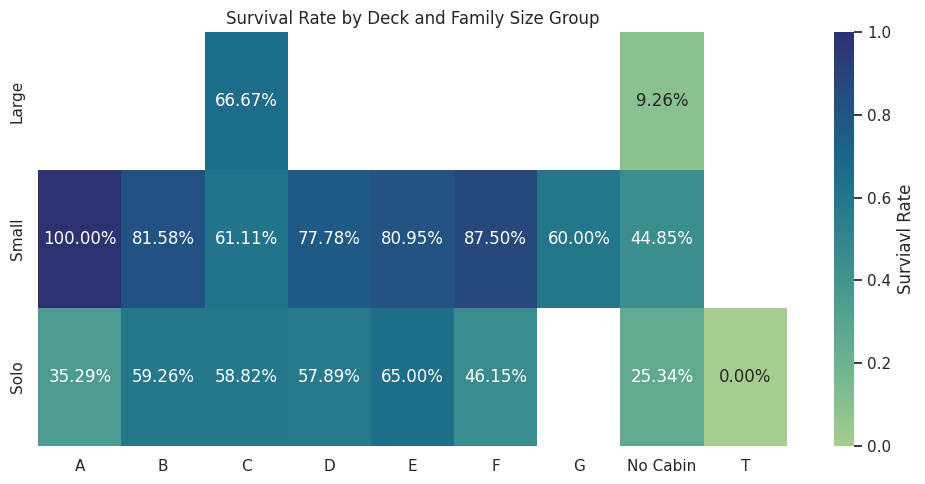

In [101]:
pivot_family = df.pivot_table(index ='FamilyGroup', columns = 'Deck', values = 'Survived', aggfunc ='mean')
plt.figure(figsize=(10,5))
sns.heatmap(pivot_family,annot =True,  fmt =".2%", cmap='crest',  cbar_kws={'label' : 'Surviavl Rate'})
plt.title('Survival Rate by Deck and Family Size Group')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()
plt.show()

The heatmap highlights a compelling pattern: passengers traveling with family members and assigned cabins had a significantly** higher chance of survival**.
  * Passengers who were part of a family group and had identifiable cabin numbers —had higher survival rate.
  * In contrast, solo travelers without cabin assignments were among the least likely to survive.


This suggests that both social and spatial factors played crucial roles in survival:
 * Being part of a family group may have increased the likelihood of coordinated evacuation.
 * Having a cabin assignment (and thus likely being in a known and accessible location) may have improved access to escape routes.

Together, these findings point to a deeper insight:

Community ties and cabin location were just as vital as class in determining survival aboard the Titanic.


# 🧠 Feature Engineering

To enrich the dataset and uncover deeper patterns, I performed several feature engineering steps. These transformations were critical in highlighting relationships that were not immediately apparent in the raw data. Although many of these new features were first introduced in earlier exploratory analyses, this section summarizes their creation and purpose:

* FamilySize: Combined SibSp and Parch to capture total group size aboard, which proved important in survival outcomes.
* FamilyGroup: Binned FamilySize into categories (Solo, Small, Large) to study the impact of group size on survival.
* Deck: Parsed from the Cabin column to represent passenger location on the ship — a key spatial factor in survival.
* AgeGroup: Binned Age into life stages (Child, Teen, Adult, Senior) to explore age-related survival trends.
* FareRange: Grouped Fare into quartiles to reduce skewness and simplify comparisons between socioeconomic groups.

These engineered features were used not only to drive richer insights during analysis, but also to prepare the dataset for potential predictive modeling tasks.

# 🔗 Correlation Analysis

## Numerical Correlation Matrix (Pearson)

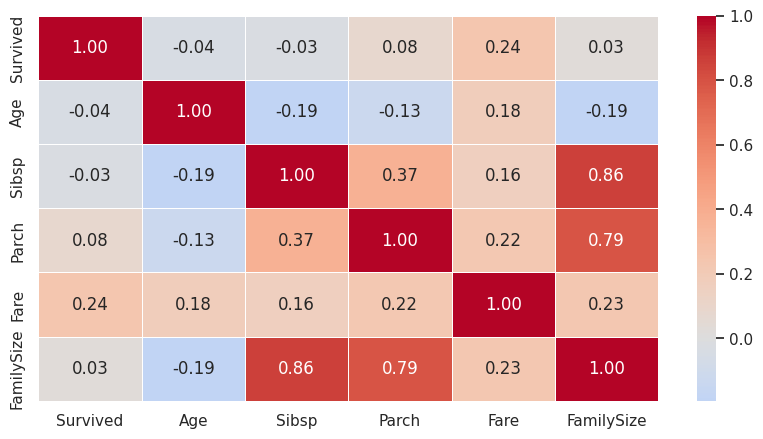

In [102]:
numeric_cols = ['Survived','Age', 'Sibsp','Parch','Fare','FamilySize']
corr_matrix = df[numeric_cols].corr(method = 'pearson')
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap ='coolwarm', center = 0, linewidths= 0.5)
plt.show()

The correlation matrix above illustrates the linear relationships between selected numerical features in the Titanic dataset. While none of the correlations are particularly strong with respect to survival, a few meaningful insights emerge:

* Fare (0.24): Shows a weak positive correlation with Survived, suggesting that passengers who paid higher fares—typically those in first class—had a slightly better chance of survival. This aligns with earlier findings that socioeconomic status played a role during evacuation.
* Parch (0.08) and SibSp (-0.03): Both have weak correlations with survival. These features represent the number of parents/children and siblings/spouses aboard, respectively. While not individually strong predictors, they may have contributed to survival when considered together (e.g., family travel dynamics or assistance during evacuation).
* Age (-0.04): Exhibits a near-zero correlation with survival, implying that age alone was not a linear predictor of survival. However, non-linear effects (e.g., children and elderly vs. middle-aged adults) may be present and should be explored through categorical or bin-based age features.
* FamilySize (0.03): Also shows a weak correlation with survival. Despite being a derived feature (SibSp + Parch ), it does not provide a stronger relationship with survival than its components individually. This suggests that simply traveling with family did not drastically impact survival outcomes. FamilySize is highly correlated with SibSp (0.86) and Parch (0.79), which is expected since it's a composite of both.

##Explore Categorical Correlation with Survived

In [103]:
from scipy.stats import chi2_contingency

categorical_features = ['Sex', 'Pclass', 'Embarked', 'Deck']

def chi_square_test(feature):
    contingency = pd.crosstab(df[feature], df['Survived'])
    chi2, p, dof, ex = chi2_contingency(contingency)
    print(f"Chi-squared test for {feature}: p-value = {p:.4f}")

for col in categorical_features:
    chi_square_test(col)


Chi-squared test for Sex: p-value = 0.0000
Chi-squared test for Pclass: p-value = 0.0000
Chi-squared test for Embarked: p-value = 0.0000
Chi-squared test for Deck: p-value = 0.0000


### 🔍 Chi-Squared Test: Association Between Categorical Features and Survival

To statistically assess whether certain **categorical variables** are associated with the survival outcome, I performed **Chi-squared tests of independence**. A p-value below 0.05 indicates a statistically significant association.

| Feature    | p-value | Conclusion                               |
|------------|---------|------------------------------------------|
| `Sex`      | 0.0000  | ✅ Strong, significant association        |
| `Pclass`   | 0.0000  | ✅ Statistically significant association  |
| `Embarked` | 0.0000  | ✅ Statistically significant association  |
| `Deck`     | 0.0000  | ✅ Statistically significant association           |

#### 🧠 Interpretation:
- **Sex** showed a very strong relationship with survival (p < 0.0001), confirming that gender played a major role — likely influenced by evacuation protocols ("women and children first").
- **Pclass** and **Embarked** were also significantly associated with survival. This reinforces findings from earlier analysis: higher-class passengers and those who embarked at certain ports (like Cherbourg) had better chances of survival.
- **Deck**, also showed a statistically significant association with survival (p < 0.0001). Although missing or imputed values may affect the reliability of the pattern, the test still indicates a meaningful relationship between cabin location and survival.

Overall, these tests support the hypothesis that **social and boarding-related factors significantly influenced survival**, aligning with historical accounts of the Titanic disaster.


# 📤 Preparing for Modeling

In [104]:
df_model = df.drop(columns=[ 'TravelAlone', 'Parch_Group', 'Fare_Range','FamilyGroup','Sibsp','Parch']) #,'Deck','AgeGroup'
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      1309 non-null   int8    
 1   Survived    1309 non-null   int8    
 2   Sex         1309 non-null   int64   
 3   Age         1309 non-null   Float32 
 4   Fare        1309 non-null   Float32 
 5   Embarked    1309 non-null   category
 6   Deck        1309 non-null   category
 7   AgeGroup    1309 non-null   category
 8   FamilySize  1309 non-null   int8    
dtypes: Float32(2), category(3), int64(1), int8(3)
memory usage: 31.5 KB


## Handling Outliers

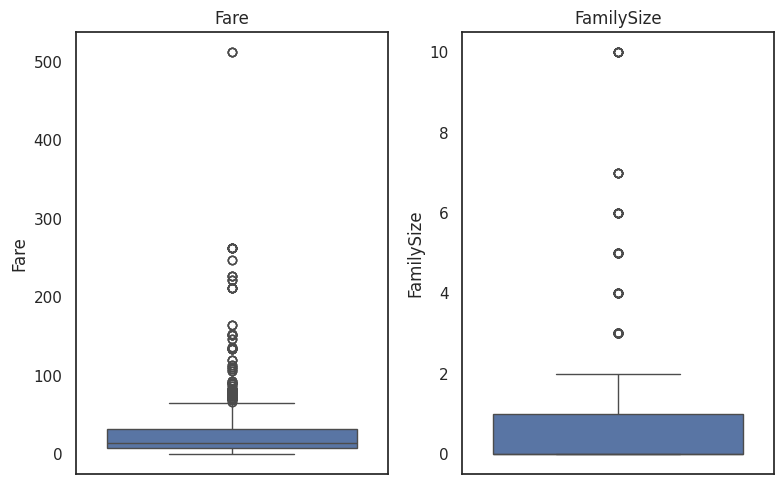

In [105]:
num_columns = ['Fare', 'FamilySize'] #'Age',

plt.figure(figsize=(8, 5))
for i, col in enumerate(num_columns):
    plt.subplot(1, len(num_columns), i+1)
    sns.boxplot(y = df_model[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [106]:
def cap_outliers (df_model, column):
  Q1 = df_model[column].quantile(0.25)
  Q2 = df_model[column].quantile(0.75)
  IQR = Q2 - Q1

  Lower_Bound = Q1 - 1.25 * IQR
  Upper_Bound = Q2 + 1.25 * IQR

  df_model[column] = df_model[column].apply(lambda x: Lower_Bound if x < Lower_Bound else Upper_Bound if x > Upper_Bound else x)

for col in num_columns:
  cap_outliers(df_model, col)

To improve model robustness, I examined outliers in numerical features (`Age`, `Fare`, `FamilySize`) using boxplots and the interquartile range (IQR) method.

Rather than dropping data points, I applied **capping** — replacing extreme outliers with upper or lower threshold values. This preserves the dataset size while reducing skewness and model sensitivity to extreme values.

This preprocessing step helps models like logistic regression, SVM, and KNN perform more reliably.


## Encoding Categorical Features

In [107]:
df_encoded = pd.get_dummies(df_model, columns = ['Pclass','Embarked','Deck','AgeGroup'], drop_first=True)

In [108]:
df_encoded.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'FamilySize', 'Pclass_2', 'Pclass_3',
       'Embarked_Q', 'Embarked_S', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E',
       'Deck_F', 'Deck_G', 'Deck_No Cabin', 'Deck_T', 'AgeGroup_Teen',
       'AgeGroup_Adult', 'AgeGroup_Senior'],
      dtype='object')

## Splitting the Data into Training and Test Sets and Scale

In [109]:
# Split data into train and test
import sklearn
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Survived', axis =1)
y = df_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state = 42, stratify=y) # stratify=y keeps same ratio of classes (e.g. survived/not) in train/test sets

In [110]:
# Check class distribution in the whole dataset
print("Original class distribution:")
print(y.value_counts(normalize=True))

# After splitting
print("\nTrain set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

Original class distribution:
Survived
0    0.618029
1    0.381971
Name: proportion, dtype: float64

Train set class distribution:
Survived
0    0.617956
1    0.382044
Name: proportion, dtype: float64

Test set class distribution:
Survived
0    0.618321
1    0.381679
Name: proportion, dtype: float64


This means that stratified split preserved the class balance correctly.

In [111]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.8092

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       162
           1       0.74      0.77      0.75       100

    accuracy                           0.81       262
   macro avg       0.80      0.80      0.80       262
weighted avg       0.81      0.81      0.81       262



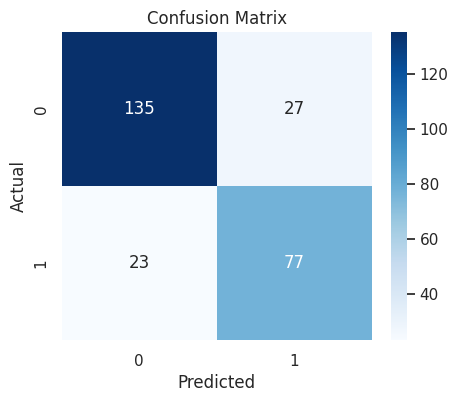

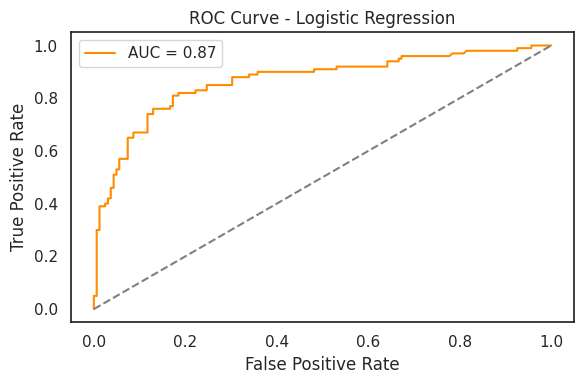

In [113]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Predict
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.tight_layout()
plt.show()


Key Insights

- The model performs strongly in identifying passengers who **did not survive**.
- Slightly lower performance for **survivors**, but recall (77%) is still acceptable.
- The model's overall F1-scores show balanced performance across classes.
- Some survivors are misclassified, which could be improved with:
  - Feature engineering (e.g., age bins)
  - Adjusting classification thresholds
  - Exploring other models (e.g., Random Forest, XGBoost)

Conclusion

This logistic regression model provides a solid baseline with over 80% accuracy. It captures key survival patterns from the Titanic dataset and lays the groundwork for further optimization.

##  Cross-Validation

* Use k-fold cross-validation to assess model generalization

* Helps avoid overfitting on train-test splits

In [114]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validation accuracy scores: [0.52290076 0.78625954 0.59160305 0.70992366 0.65517241]
Mean accuracy: 0.6531718873387733


🔁 Cross-Validation Results:

To assess the model’s generalization performance, I applied 5-fold cross-validation, which helps reduce the risk of overfitting by evaluating the model on different subsets of the data.

Cross-validation scores:
[0.5229, 0.7863, 0.5916, 0.7099, 0.6552]

Mean cross-validation accuracy: 65.3%

📊 Interpretation:

The cross-validation results show moderate variance across folds.

The relatively lower mean accuracy (65.3%) compared to the test accuracy (80.5%) suggests that the model might be slightly overfitting to the training data.

Some folds may have contained data distributions less favorable for prediction, indicating potential data imbalance or sensitivity to certain feature combinations.

## Handle Imbalance


In [115]:
# Handle imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [116]:
# Train logistic regression model
imb_model = LogisticRegression(max_iter = 1000, random_state = 42)
imb_model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000, random_state=42)

Confusion Matrix:


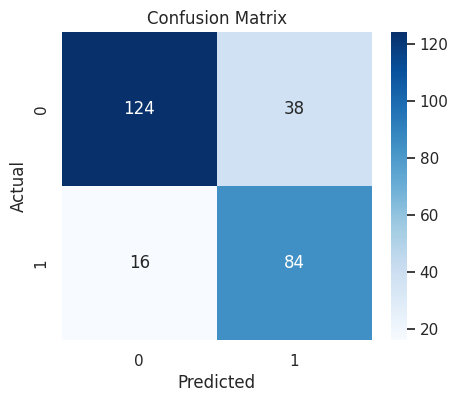


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       162
           1       0.69      0.84      0.76       100

    accuracy                           0.79       262
   macro avg       0.79      0.80      0.79       262
weighted avg       0.81      0.79      0.80       262

Accuracy: 79.39%


In [117]:
# Evaluate on test data
y_pred_imb = imb_model.predict(X_test_scaled)

print("Confusion Matrix:")
#print(confusion_matrix(y_test, y_pred_imb))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_imb), annot =True, fmt ='d', cmap = 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_imb))

print(f"Accuracy: {accuracy_score(y_test, y_pred_imb):.2%}")

The original dataset showed a significant class imbalance (more non-survivors than survivors). To improve the model's ability to detect the minority class (survivors), I applied SMOTE on the training set. This technique synthetically generates new samples for the minority class, leading to a more balanced training distribution.

 Model Performance After SMOTE:

 **Accuracy**: 79.39%

 **Precision**:

    * Class 0 (did not survive): 89%
    * Class 1 (survived): 69%

**Recall**:

    * Class 0: 77%
    * Class 1: 84% ← very important for detecting survivors

**F1-score**: Balanced performance for both classes

The recall for survivors (class 1) improved significantly, which means the model is much better at identifying passengers who actually survived — a critical factor in imbalanced classification problems.

A small trade-off in precision for class 1 is acceptable since our priority is not to miss survivors.

Overall, SMOTE helped the model generalize better to the minority class, resulting in a more balanced and fair classifier.


## Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [119]:
grid_search = GridSearchCV(
    LogisticRegression(max_iter = 1000, random_state = 42),
    param_grid,
    cv = 5,
    scoring ='f1',
    n_jobs=-1
)

In [120]:
grid_search.fit(X_train_res, y_train_res)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [121]:
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score on Training Set:", grid_search.best_score_)


Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best F1 Score on Training Set: 0.7824817934348728


In [122]:
best_model = grid_search.best_estimator_

# Predict on original test set
y_pred_imb_best = best_model.predict(X_test_scaled)

# Evaluate

print(confusion_matrix(y_test, y_pred_imb_best))
print(classification_report(y_test, y_pred_imb_best))


[[124  38]
 [ 16  84]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       162
           1       0.69      0.84      0.76       100

    accuracy                           0.79       262
   macro avg       0.79      0.80      0.79       262
weighted avg       0.81      0.79      0.80       262



After tuning logistic regression with GridSearchCV, the model performance remained the same. This indicates that most of the performance gain came from handling class imbalance using SMOTE. Logistic regression, being a simple model, reached its performance ceiling. To improve further, more complex models (e.g., Random Forest, XGBoost) will be explored.

## Random Forest model

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test_scaled)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print( classification_report(y_test, y_pred_rf))

Confusion Matrix: [[129  33]
 [ 28  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       162
           1       0.69      0.72      0.70       100

    accuracy                           0.77       262
   macro avg       0.75      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



In [124]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("=== Tuned Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_imb_best))
print("Recall:", recall_score(y_test, y_pred_imb_best))
print("Precision:", precision_score(y_test, y_pred_imb_best))
print("F1 Score:", f1_score(y_test, y_pred_imb_best))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

=== Tuned Logistic Regression ===
Accuracy: 0.7938931297709924
Recall: 0.84
Precision: 0.6885245901639344
F1 Score: 0.7567567567567568

=== Random Forest ===
Accuracy: 0.767175572519084
Recall: 0.72
Precision: 0.6857142857142857
F1 Score: 0.7024390243902439


**🔍 Model Comparison Summary**

After handling class imbalance with SMOTE, I trained and compared two models: Logistic Regression (tuned) and Random Forest (default parameters).

| Metric        | Logistic Regression | Random Forest |
| ------------- | ------------------- | ------------- |
| Accuracy      | 79.39%              | 76.72%        |
| Recall (1)    | **84%**             | 72%           |
| Precision (1) | 68.85%              | 68.57%        |
| F1 Score (1)  | **75.68%**          | 70.24%        |

**✅ Conclusion:**

The tuned Logistic Regression model outperformed Random Forest in recall and F1-score for class 1 (survivors), which aligns with the project goal: maximize detection of survivors. Despite being a simpler model, logistic regression provided more reliable performance in this case.




## XGBoost Model

In [126]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state = 42)
xgb_model.fit(X_train_res, y_train_res)

y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print( classification_report(y_test, y_pred_xgb))

Confusion Matrix: [[138  24]
 [ 22  78]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       162
           1       0.76      0.78      0.77       100

    accuracy                           0.82       262
   macro avg       0.81      0.82      0.81       262
weighted avg       0.83      0.82      0.82       262



In [127]:
# Compare all three models
print("=== Tuned Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_imb_best))
print("Recall:", recall_score(y_test, y_pred_imb_best))
print("Precision:", precision_score(y_test, y_pred_imb_best))
print("F1 Score:", f1_score(y_test, y_pred_imb_best))

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

print("\n=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))

=== Tuned Logistic Regression ===
Accuracy: 0.7938931297709924
Recall: 0.84
Precision: 0.6885245901639344
F1 Score: 0.7567567567567568

=== Random Forest ===
Accuracy: 0.767175572519084
Recall: 0.72
Precision: 0.6857142857142857
F1 Score: 0.7024390243902439

=== XGBoost ===
Accuracy: 0.8244274809160306
Recall: 0.78
Precision: 0.7647058823529411
F1 Score: 0.7722772277227723


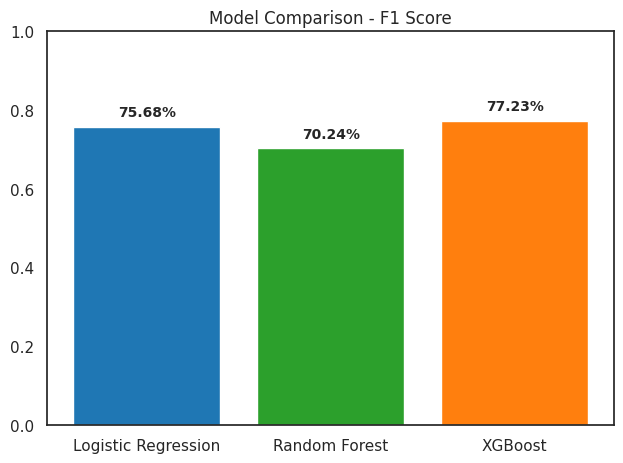

In [128]:
All_models = ['Logistic Regression', 'Random Forest', 'XGBoost']
f1_scores = [
    f1_score(y_test, y_pred_imb_best),
    f1_score(y_test, y_pred_rf),
    f1_score(y_test, y_pred_xgb)
]

bars = plt.bar(All_models, f1_scores, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.02,
        f'{height:.2%}',
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.title("Model Comparison - F1 Score")
plt.ylim(0,1)
plt.ylabel('')
plt.tight_layout()
plt.show()


The XGBoost model achieved the best overall accuracy, precision, and F1 score, making it the strongest performer for predicting survivors on the Titanic dataset. While Logistic Regression achieved the highest recall, prioritizing detecting survivors, XGBoost offers a better balance between recall and precision, leading to the best F1 score. This suggests that XGBoost provides the most reliable predictions for this imbalanced classification task.

# 🧾 Conclusion

This project aimed to predict passenger survival on the Titanic using supervised machine learning models. By walking through a complete data science pipeline—from loading and exploring the data to cleaning, engineering features, handling class imbalance, and evaluating models—I was able to demonstrate a structured and thoughtful approach to solving a real-world classification problem.

**✅ Key Steps and Findings:**
* **Data Understanding & Cleaning**

The dataset was explored in-depth through univariate, bivariate, and multivariate analyses. I handled missing values and optimized memory usage for performance. Feature engineering played a crucial role: family size was calculated, and categorical variables were encoded for modeling.

* **Class Imbalance Handling**

The Survived column was imbalanced. To address this, I used SMOTE (Synthetic Minority Over-sampling Technique), which significantly improved model performance, especially recall for the minority class (survivors).

* **Model Training & Comparison**

I trained three models on the resampled data:
1. Tuned Logistic Regression

Achieved the highest recall (84%), making it excellent for minimizing false negatives (i.e., not missing survivors).

2. Random Forest Classifier

Performed reasonably but was outperformed by both other models in recall and F1 score.

3. XGBoost Classifier

Achieved the highest F1 Score (77.23%), showing a strong balance between recall and precision. It also recorded the best accuracy (82.44%), making it the most reliable overall model.

**🧠 Final Insights:**

* The XGBoost model is the best performer overall and is recommended for deployment.
* Logistic Regression is still valuable when maximizing survivor detection (recall) is the top priority, such as in life-or-death contexts.
* Feature engineering, proper preprocessing, and addressing data imbalance were essential to the project’s success.

This project showcases the full life cycle of a data science task, from raw data to actionable model comparison. It reflects a thoughtful balance between domain understanding, statistical rigor, and machine learning application—key competencies for any data analyst or data scientist role.